In [1]:
%reload_ext autoreload
%autoreload 2

import os, psutil

from rocket_fft import numpy_like, scipy_like

numpy_like()

os.environ['NUMEXPR_MAX_THREADS'] = '20'
os.environ['NUMBA_DEBUGINFO'] = '0'

from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune
import alphatims.bruker as bruker

from alphabase.spectral_library.base import SpecLibBase
from alphadia.extraction.planning import Plan, Workflow

yaml_file = 'config.yaml'

raw_files = ['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d']

output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_05_29_isotope_debugging'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')


0:00:01.028943  WARNING: WARNING: Temp mmap arrays are written to /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/temp_mmap_jefazuz7. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 958,799,581,184
0:00:01.040164  WARNING: WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
0:00:01.040470  INFO: 


In [2]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_d12_shared_eg_n_fragments.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)

In [3]:
test_lib.precursor_df.channel.value_counts()

0     91732
4     45867
8     45867
12    45867
Name: channel, dtype: int64

In [4]:
plan = Plan(raw_files, config_update = 
            {'extraction':
                {
                    'target_mobility_tolerance': 0.04,
                    'target_rt_tolerance': 40,
                    'target_ms1_tolerance': 10,
                    'min_epochs': 3,
                }
            }
        )
plan.from_spec_lib_base(test_lib)

0:00:06.540213  PROGRESS:       _   _      _         ___ ___   _   
0:00:06.540645  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:06.540922  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:06.541123  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:06.541346  PROGRESS:            |_|                            
0:00:06.541581  PROGRESS: 
0:00:06.542383  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:00:06.549422  INFO: Applying config update from dict
0:00:06.549683  PROGRESS: version: 1.0.2
0:00:06.549940  PROGRESS: hostname: Georgs-MBP.fritz.box
0:00:06.550194  PROGRESS: date: 2023-06-19 11:20:41
0:00:10.136681  INFO: renaming precursor_columns columns
0:00:10.137523  INFO: renaming fragment_columns columns
0:00:10.138000  INFO: ========= Library Stats =========
0:00:10.138286  INFO: Number of precursors: 229,333
0:00:10.167481  INFO: 	thereof targets:183,468
0:00:10.167914

In [5]:

for dia_data, precursors_flat, fragments_flat in plan.get_run_data():
    break
reference_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

workflow = Workflow(
    plan.config, 
    dia_data, 
    reference_flat, 
    fragments_flat
)

#workflow.calibration()
workflow.calibration_manager.load(os.path.join(output_location, 'calibration.pkl'))
#workflow.calibration_manager.save(os.path.join(output_location, 'calibration.pkl'))

0:00:10.452315  INFO: rt_type automatically determined as irt
0:00:10.452692  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d
0:00:10.453956  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d
0:00:10.454344  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d
0:00:10.591055  INFO: Reading 17,439 frames with 1,609,581,456 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d
100%|██████████| 17439/174

0:00:59.791167  INFO: calibration group: precursor, predicting mz
0:00:59.801946  INFO: calibration group: precursor, predicting rt
0:00:59.829486  INFO: calibration group: precursor, predicting mobility
0:00:59.840509  INFO: calibration group: fragment, predicting mz
0:01:00.158074  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:01:00.751137  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:01:00.751613  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:01:00.751861  INFO: FWHM in RT is 5.00 seconds, sigma is 1.11
0:01:00.752036  INFO: FWHM in mobility is 0.015 1/K_0, sigma is 9.85


91732


  0%|          | 0/332555 [00:00<?, ?it/s]/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from float64 to float32. Precision may be lost.
  numba_func(i, *args)
/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from int64 to float32. Precision may be lost.
  numba_func(i, *args)
100%|██████████| 332555/332555 [00:33<00:00, 10024.88it/s]
0:07:27.656963  INFO: Scored 332555 candidates
0:07:27.756067  INFO: 1.20% of targets failed, 2.75% of decoys failed


(326017, 25)
(326017,)


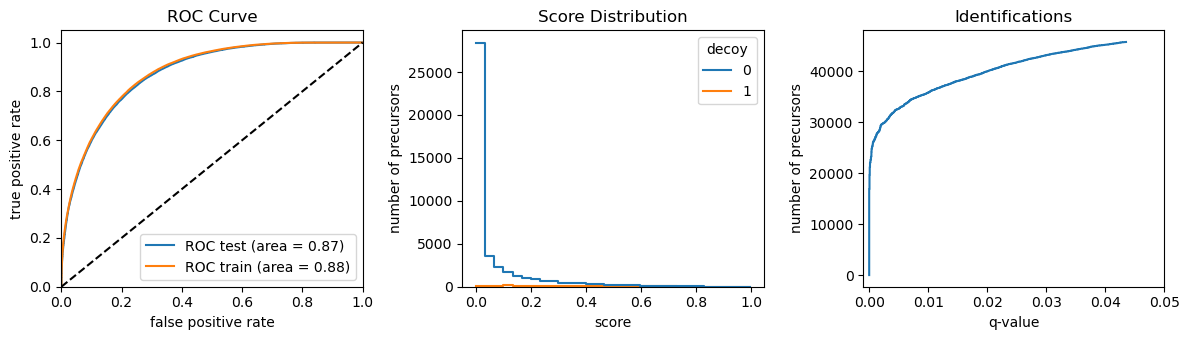

0:07:52.562388  PROGRESS: === extraction finished, 0.05 FDR: 43,789, 0.01 FDR: 35,435, 0.001 FDR: 26,710 ===


In [6]:
df_d0 = workflow.extraction()

In [7]:
workflow.calibration_manager.predict(precursors_flat, 'precursor')
workflow.calibration_manager.predict(fragments_flat, 'fragment')


0:10:40.217098  INFO: calibration group: precursor, predicting mz
0:10:40.241838  INFO: calibration group: precursor, predicting rt
0:10:40.303538  INFO: calibration group: precursor, predicting mobility
0:10:40.333168  INFO: calibration group: fragment, predicting mz


In [11]:
df_d0.to_csv(os.path.join(output_location, 'd0.tsv'), index=False, sep='\t')


In [10]:
precursors_flat.to_csv(os.path.join(output_location, 'd0.tsv'), index=False, sep='\t')
fragments_flat.to_csv(os.path.join(output_location, 'd0.tsv'), index=False, sep='\t')


In [12]:
from alphadia.extraction import hybridselection, scoring, quadrupole

In [13]:
reference_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

In [14]:
config = hybridselection.HybridCandidateConfig()
config.update(workflow.config['extraction']['HybridCandidateConfig'])
config.update({
    'rt_tolerance': 40,
    'mobility_tolerance': 0.04,
    'candidate_count': 1,
    'precursor_mz_tolerance': 10,
    'fragment_mz_tolerance': 15,
    'sigma_scale_mobility': 2.,
    'sigma_scale_rt': 0.3,
    'candidate_count': 1,
    'center_fraction': 0.5,
    'max_cardinality':10,
    
})

extraction = hybridselection.HybridCandidateSelection(
    dia_data,
    reference_flat,
    fragments_flat,
    config.jitclass(),
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    fwhm_rt = 5.,
    fwhm_mobility = 0.01,
    thread_count=10,
    debug=False
)
candidates_df = extraction()

0:17:11.387840  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:17:11.388295  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:11.388539  INFO: FWHM in RT is 5.00 seconds, sigma is 0.66
0:17:11.388714  INFO: FWHM in mobility is 0.010 1/K_0, sigma is 13.14


91732


100%|██████████| 91732/91732 [01:19<00:00, 1158.65it/s]


In [35]:
from alphadia.extraction import data, quadrupole, validate, plexscoring

In [52]:
fragment_container = plexscoring.assemble_fragments(fragments_flat)

precursor 0 channel 0


  0%|          | 0/10 [00:00<?, ?it/s]

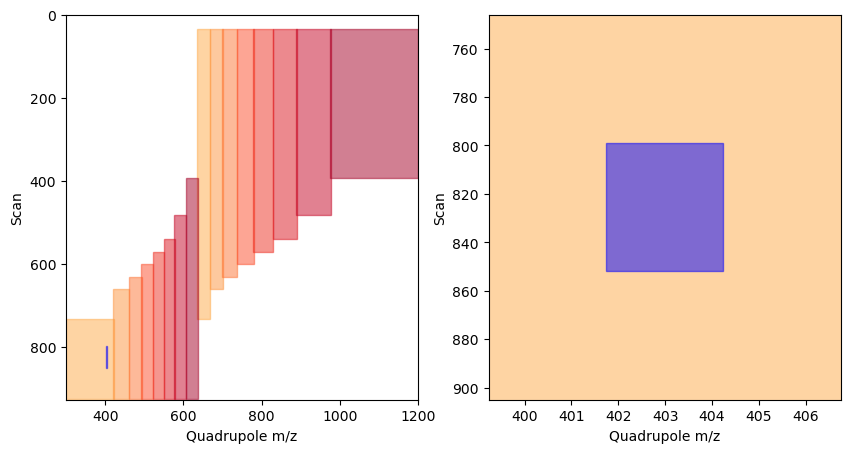

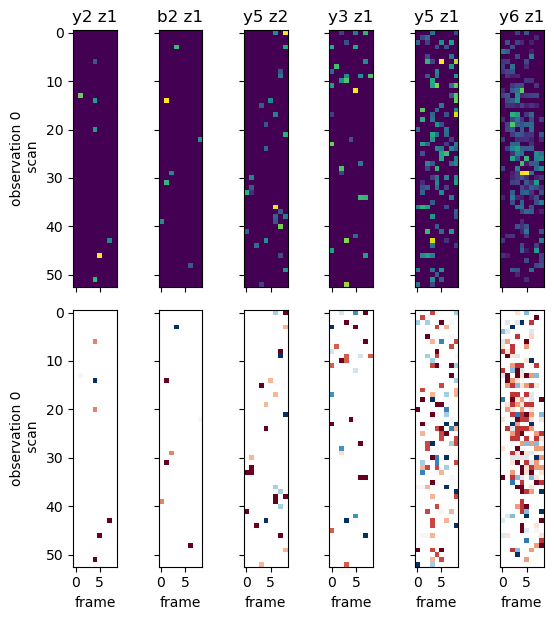

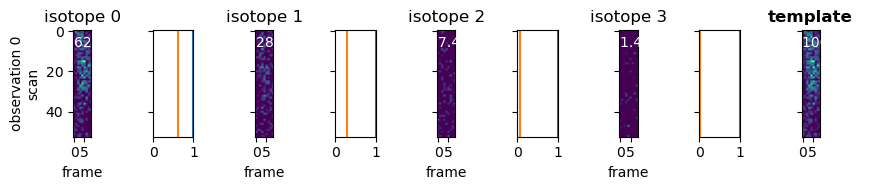

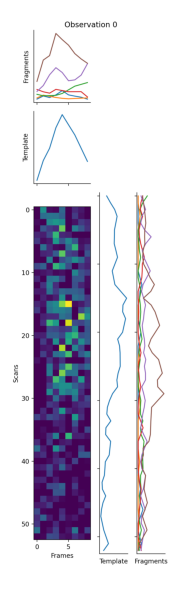

 10%|█         | 1/10 [00:01<00:12,  1.34s/it]

precursor 13051 channel 0


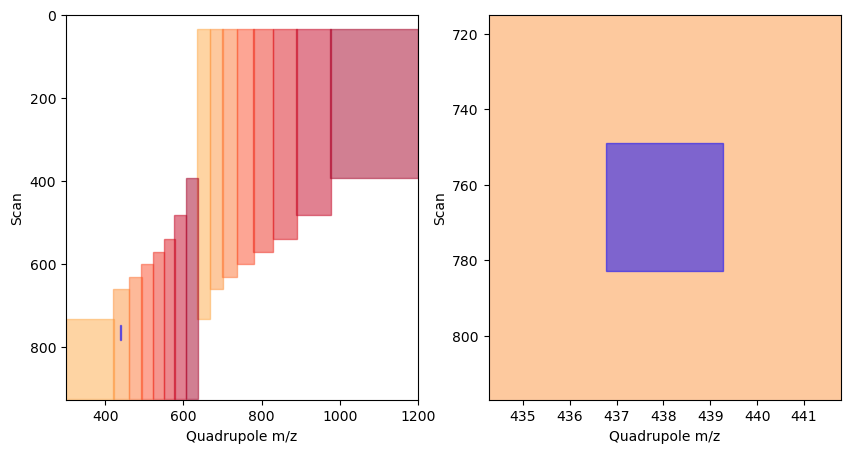

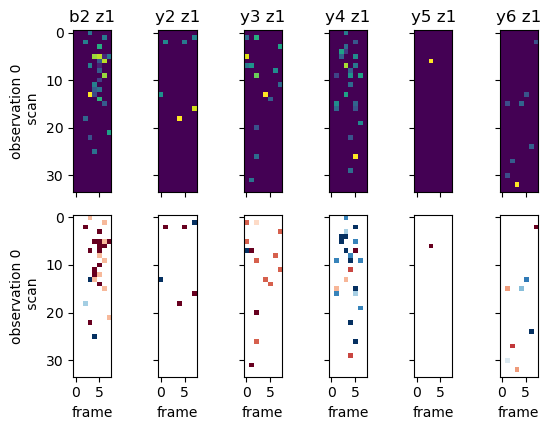

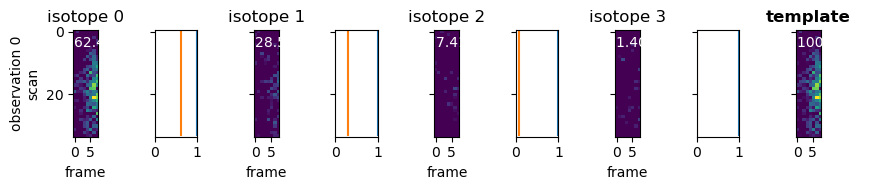

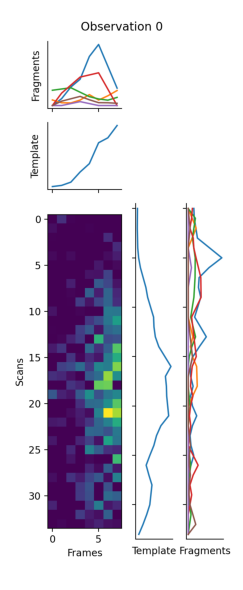

 20%|██        | 2/10 [00:02<00:08,  1.04s/it]

precursor 122623 channel 0


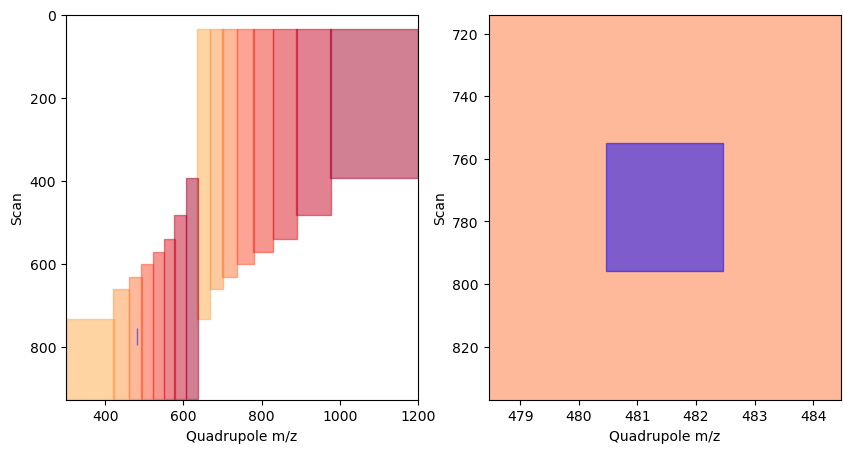

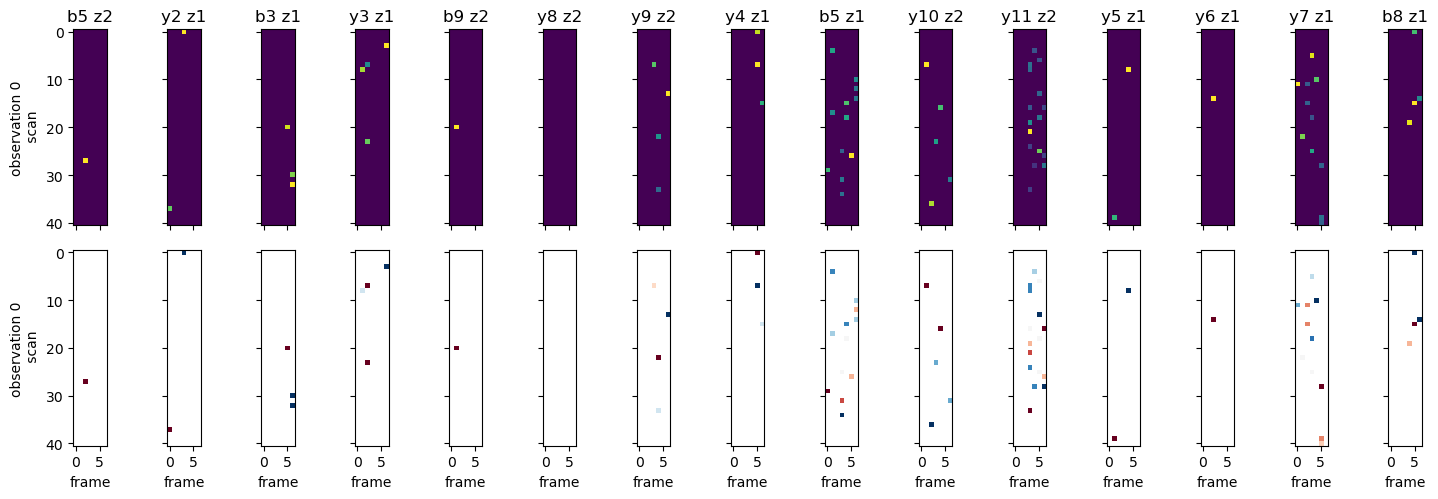

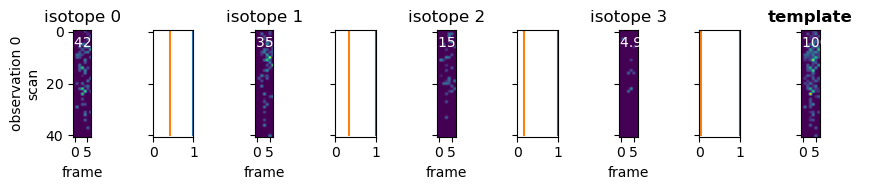

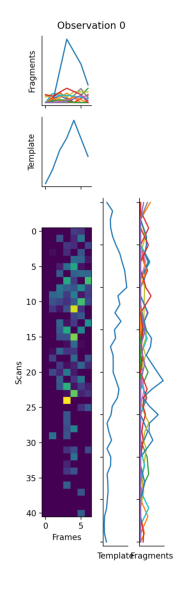

 30%|███       | 3/10 [00:03<00:08,  1.21s/it]

precursor 122631 channel 0


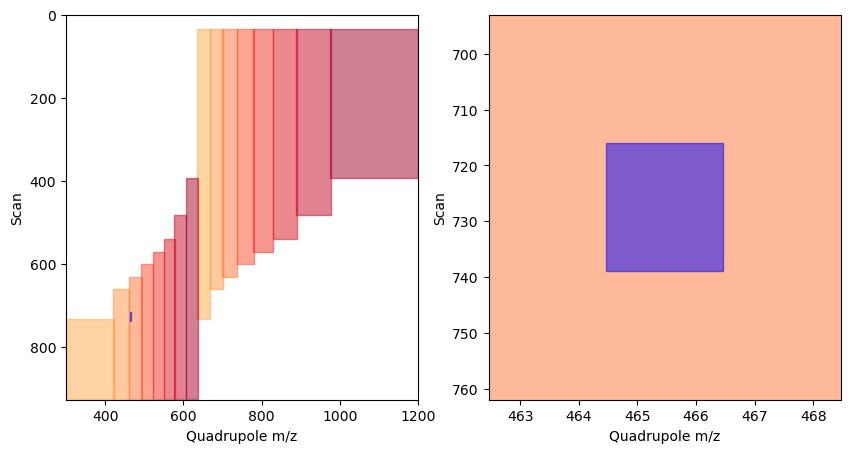

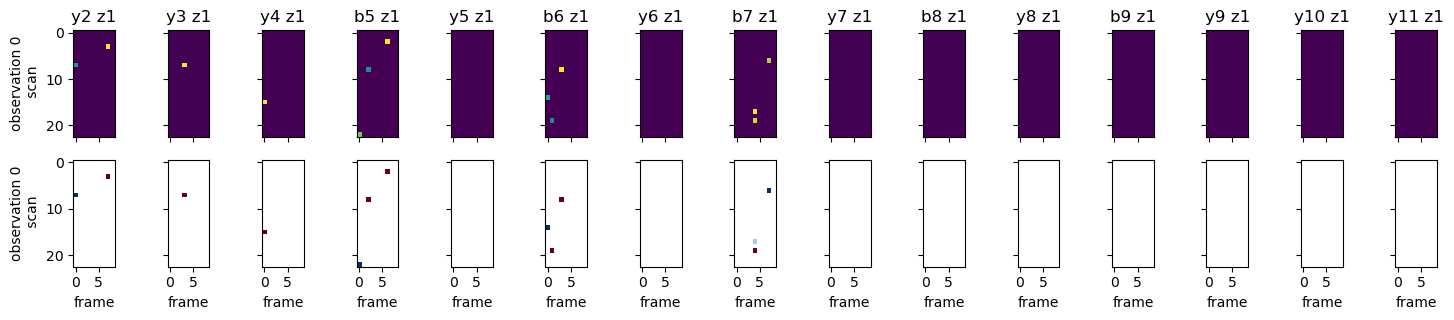

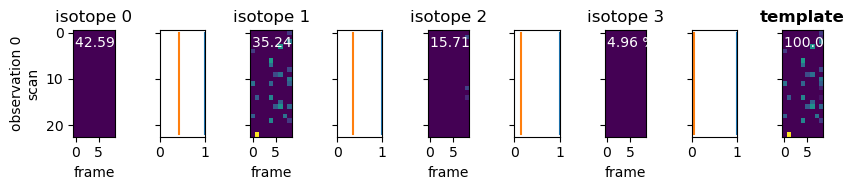

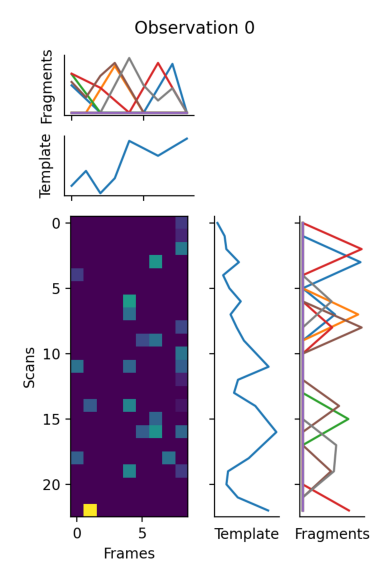

 40%|████      | 4/10 [00:05<00:08,  1.45s/it]

precursor 171930 channel 0


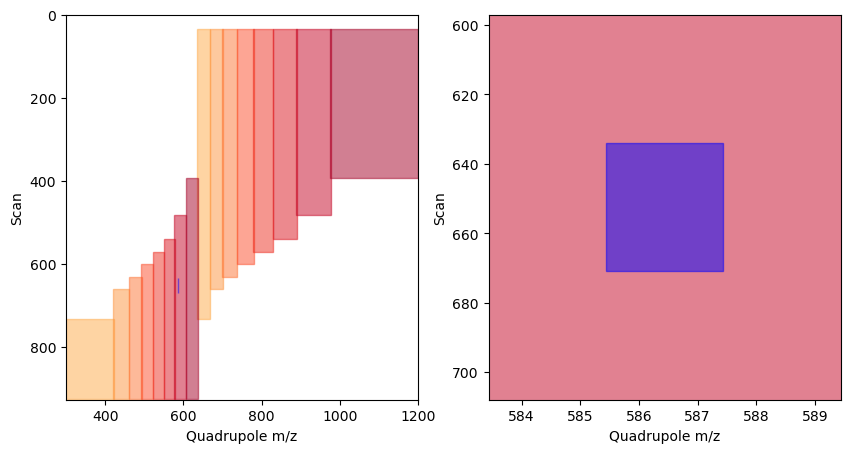

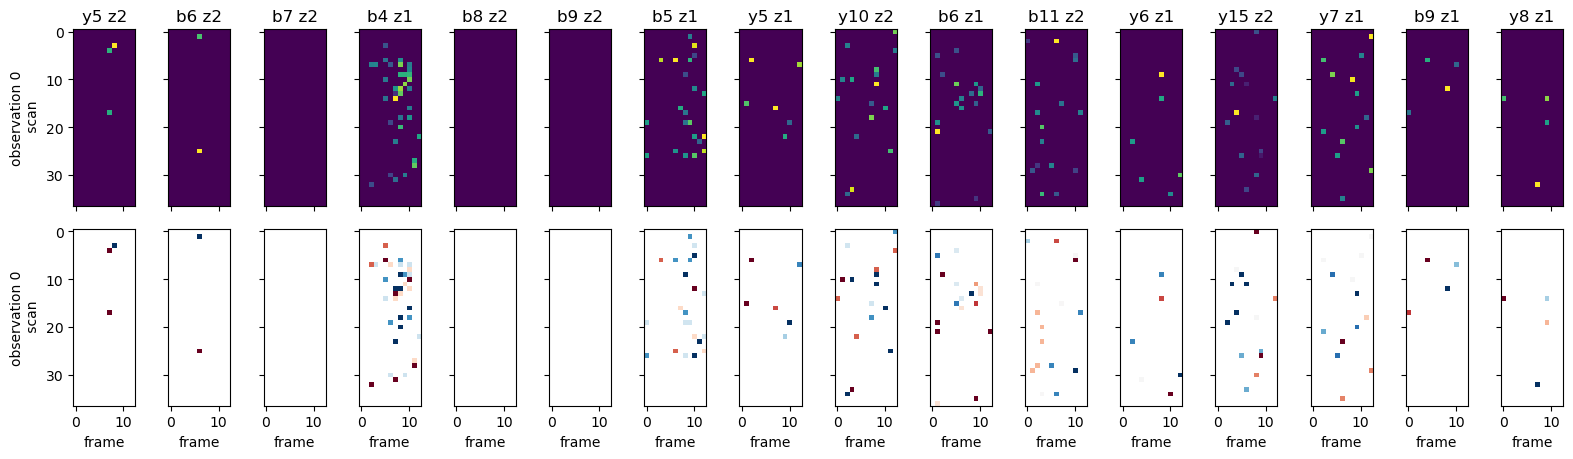

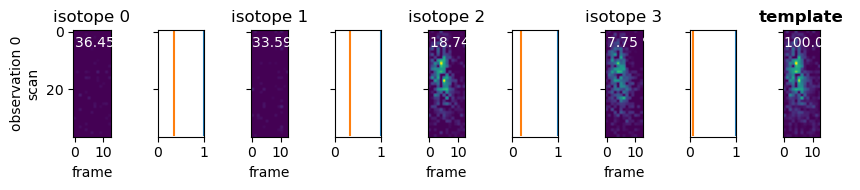

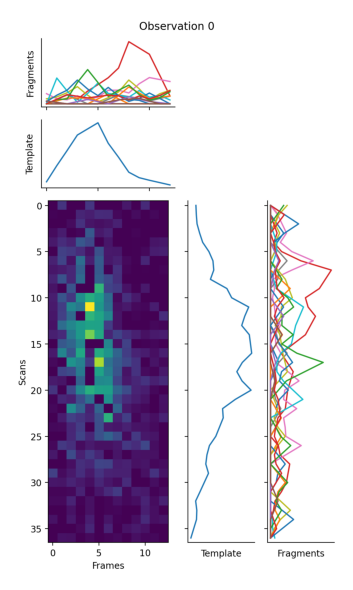

 50%|█████     | 5/10 [00:06<00:07,  1.46s/it]

precursor 172060 channel 0


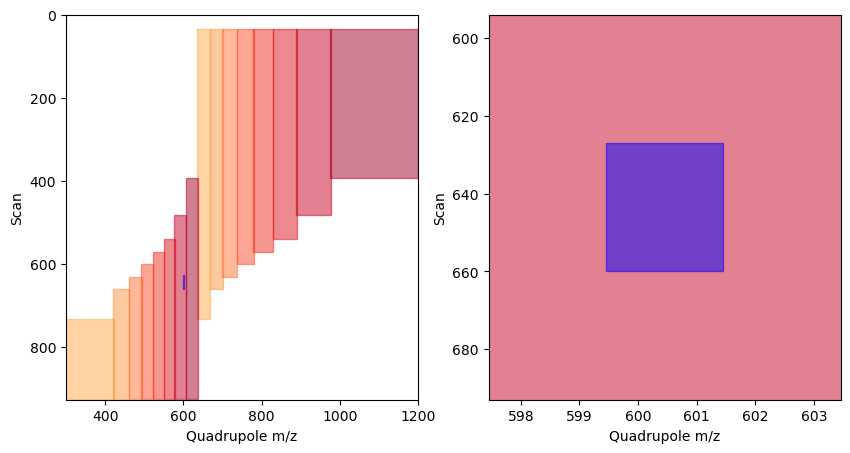

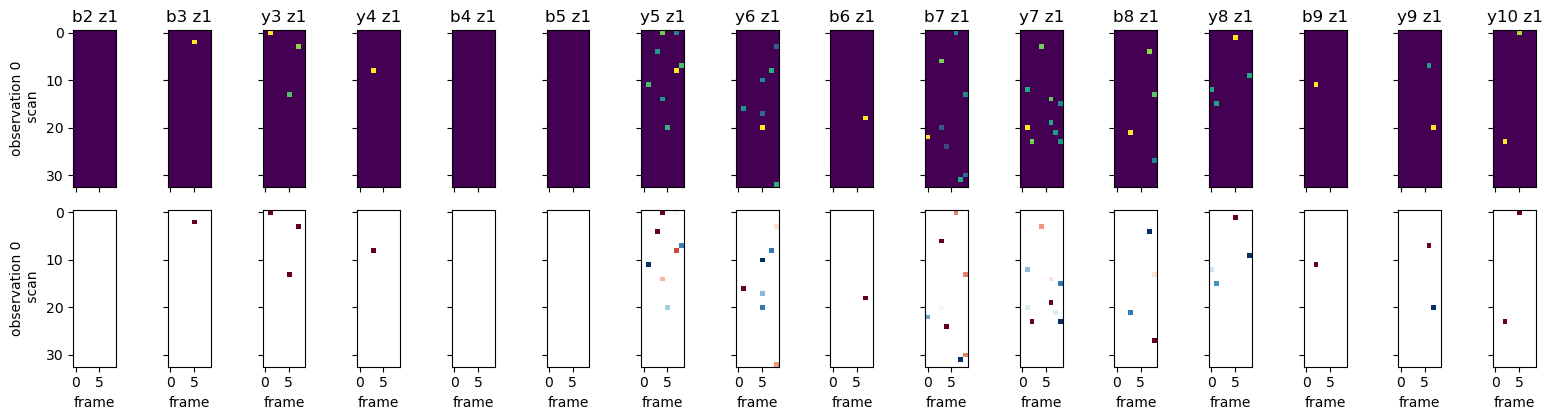

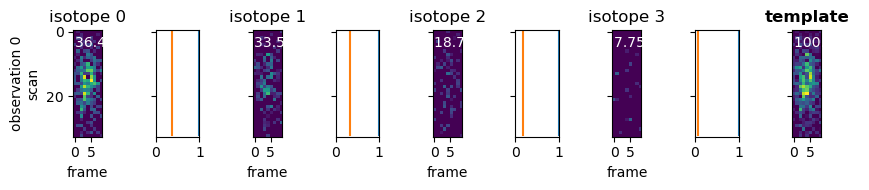

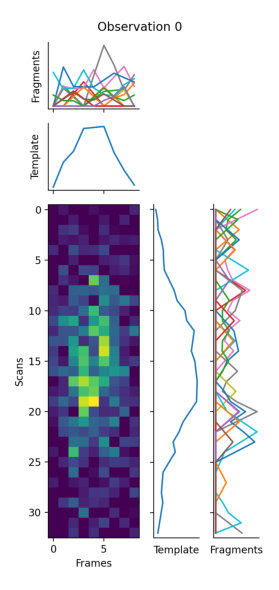

 60%|██████    | 6/10 [00:08<00:05,  1.46s/it]

precursor 172037 channel 0


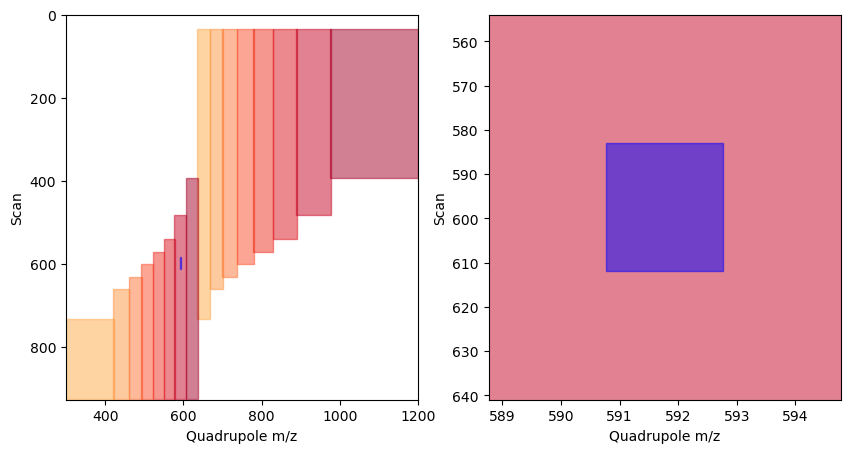

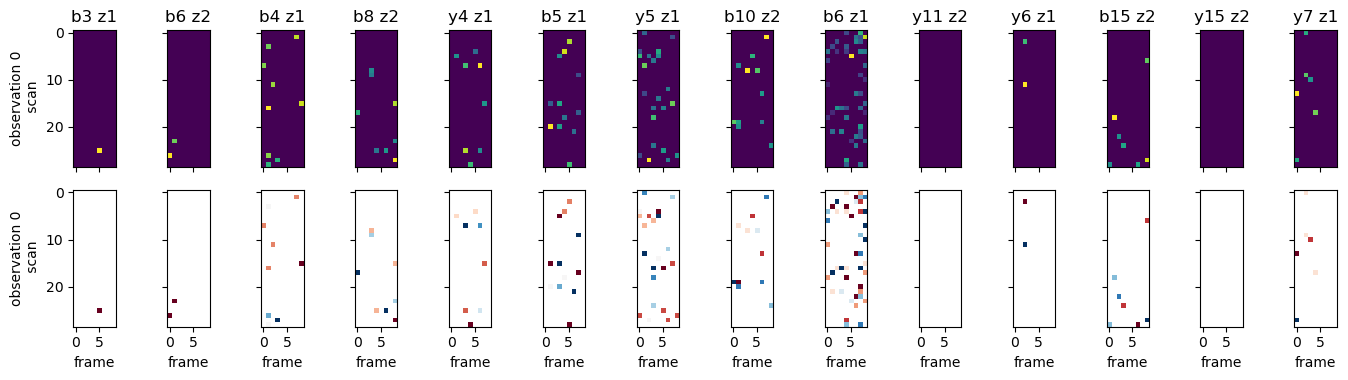

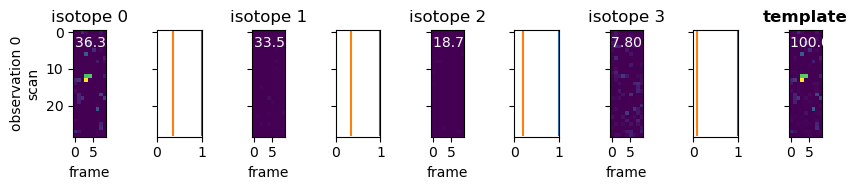

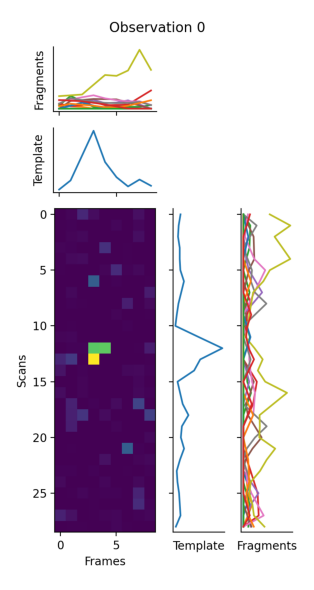

 70%|███████   | 7/10 [00:10<00:04,  1.57s/it]

precursor 171848 channel 0


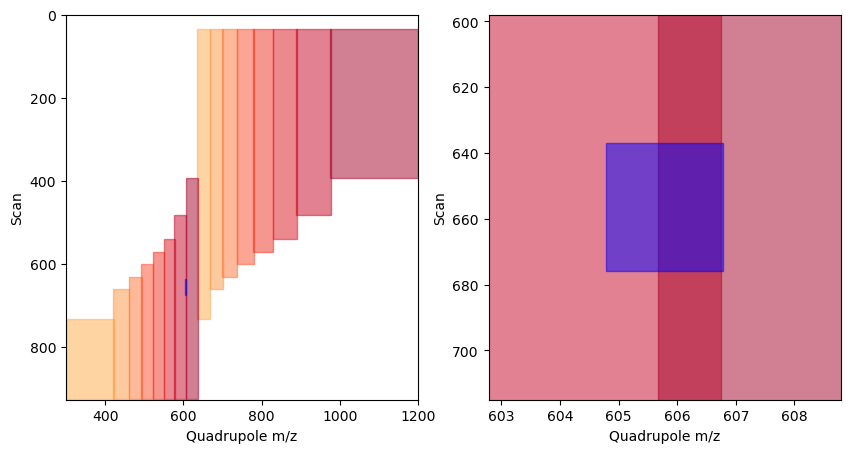

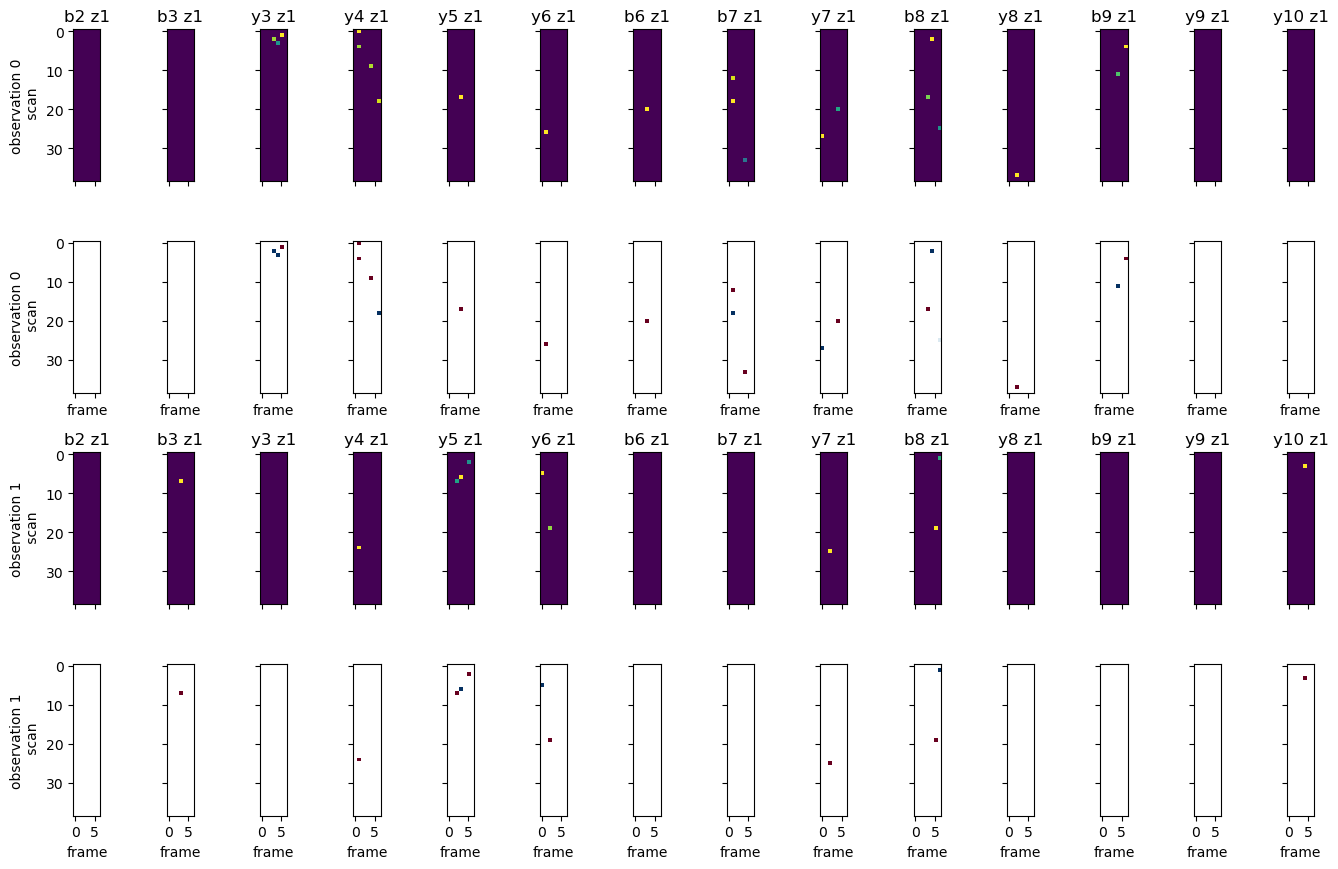

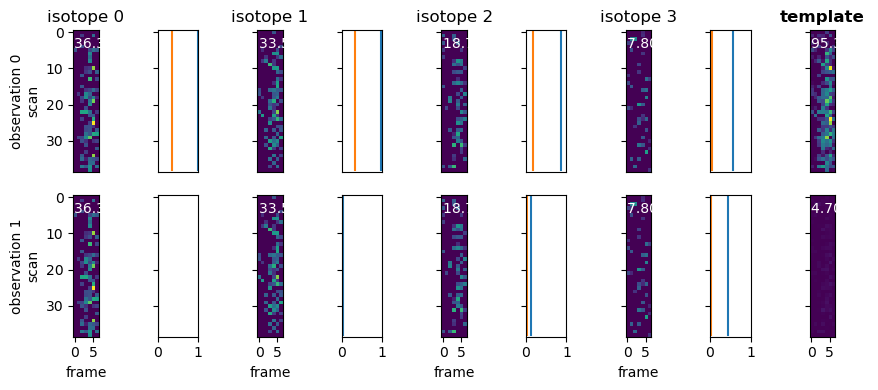

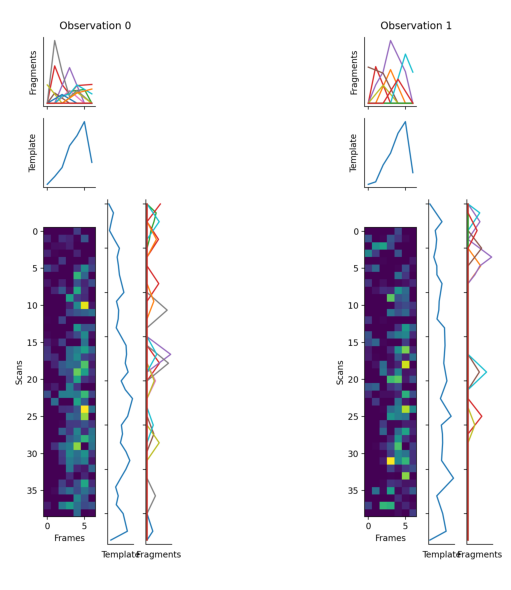

 80%|████████  | 8/10 [00:12<00:03,  1.98s/it]

precursor 161022 channel 0


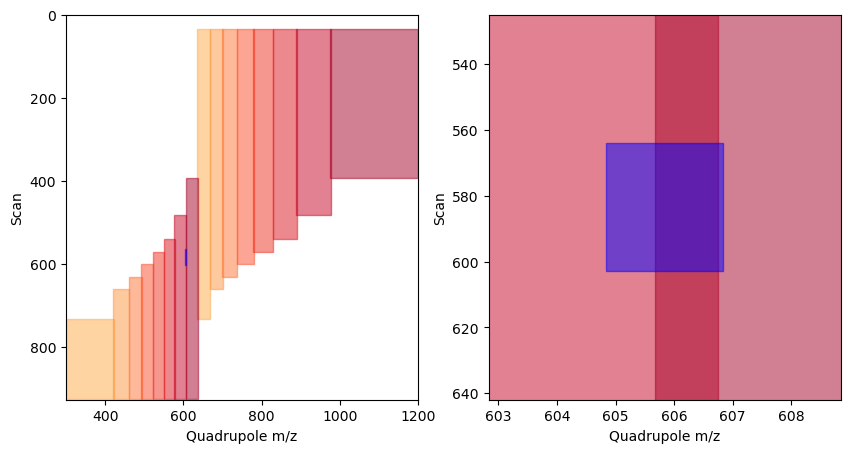

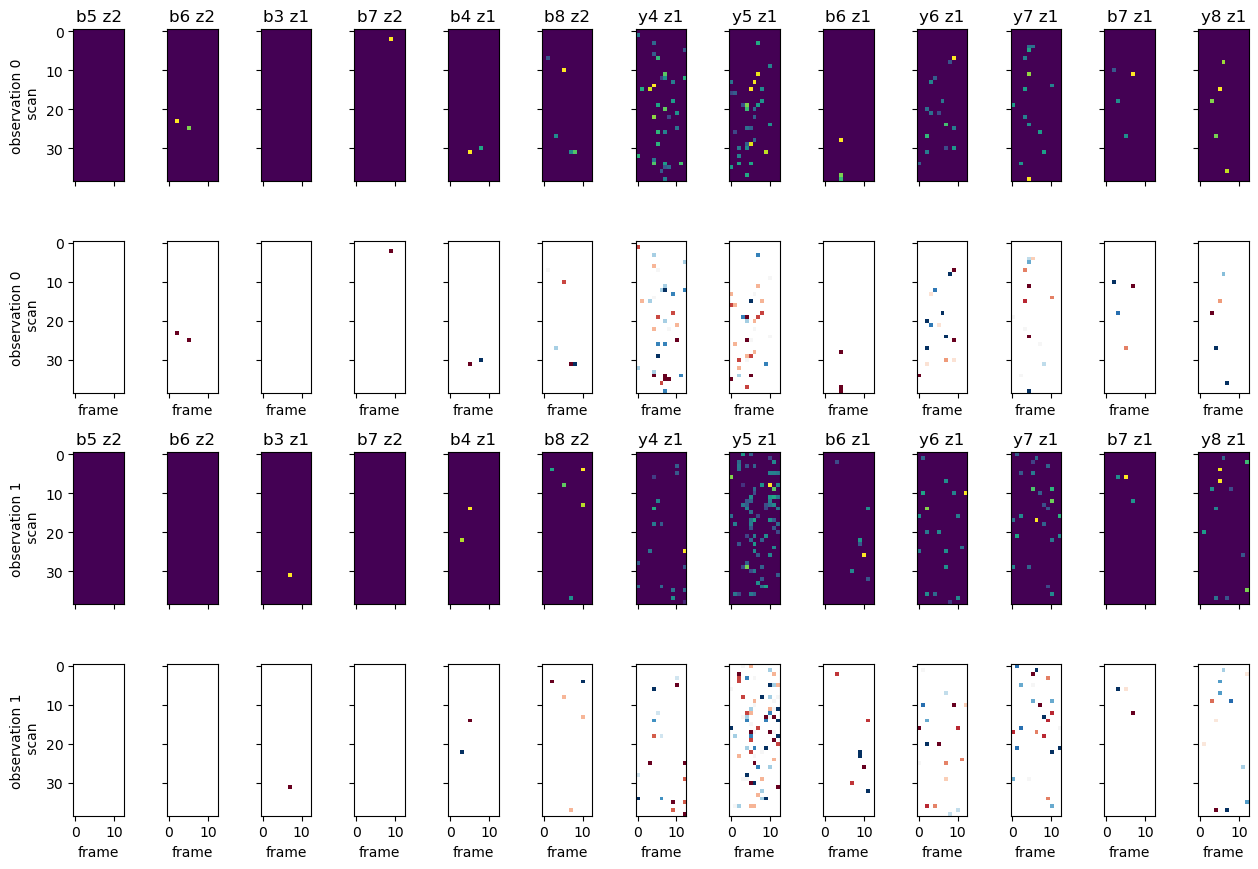

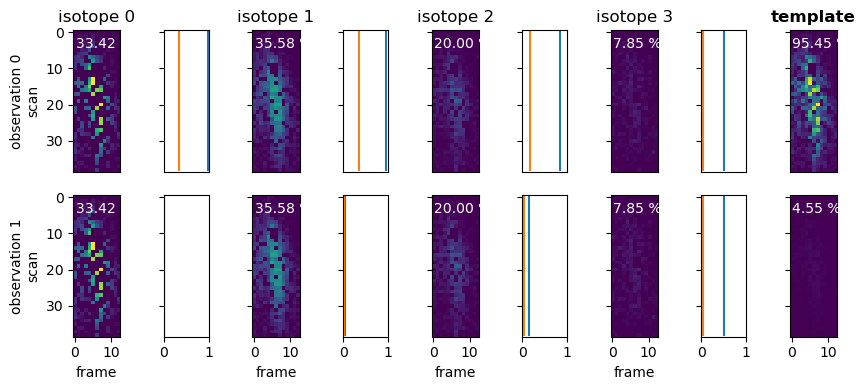

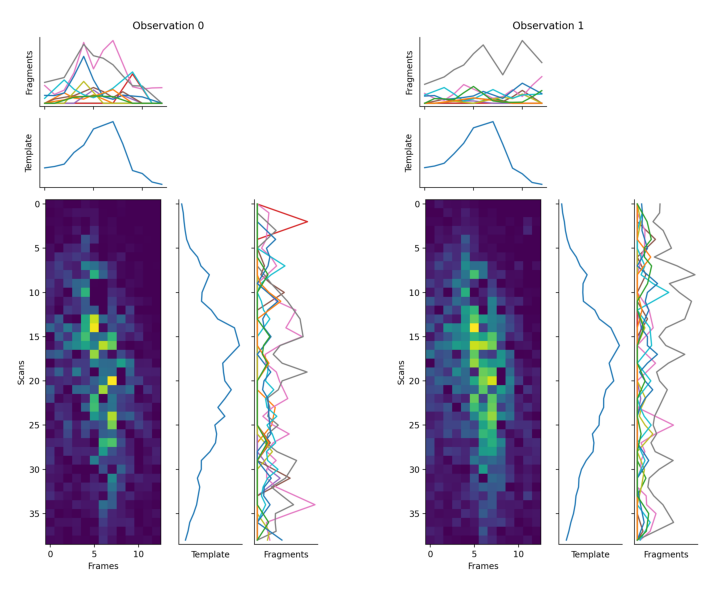

 90%|█████████ | 9/10 [00:16<00:02,  2.36s/it]

precursor 161021 channel 0


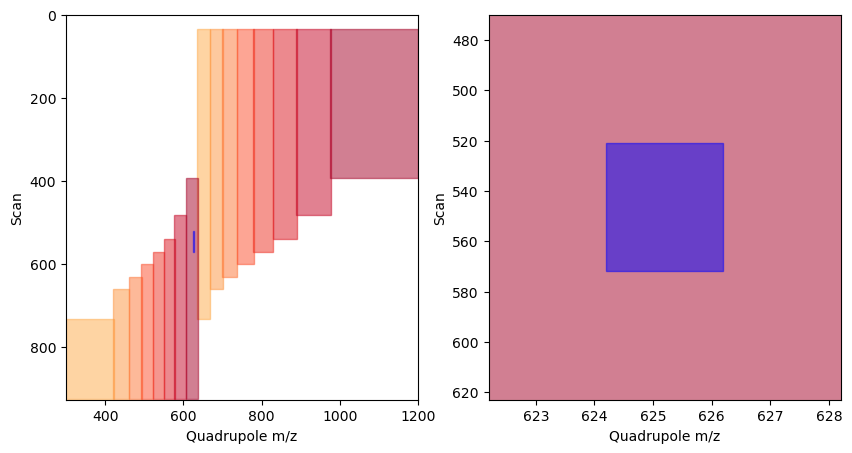

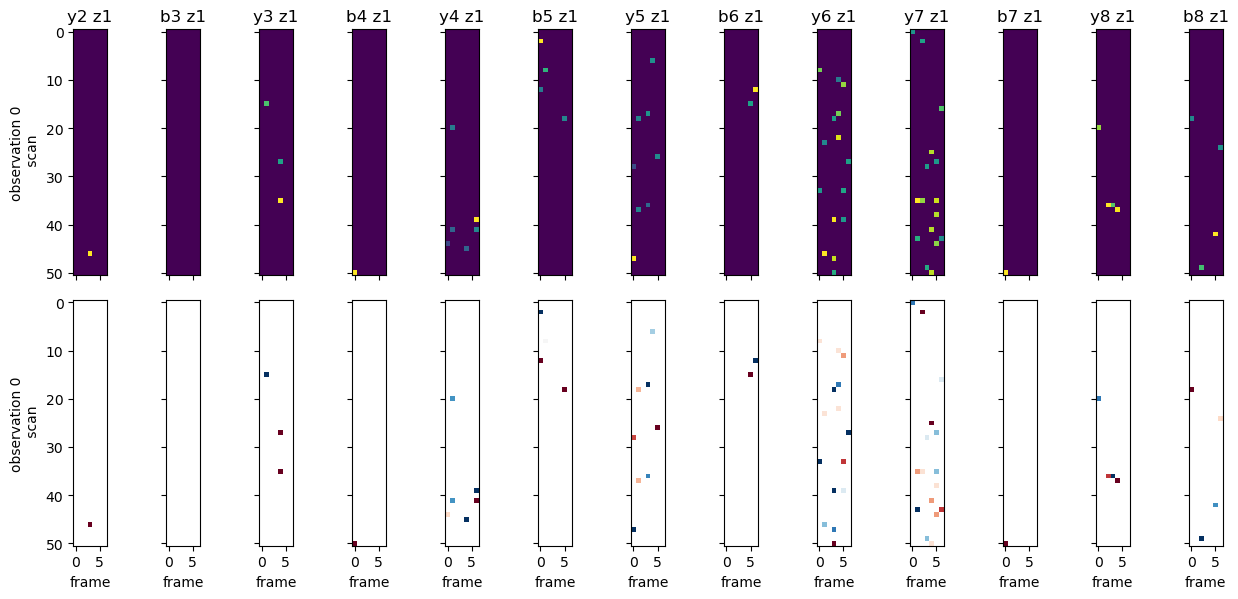

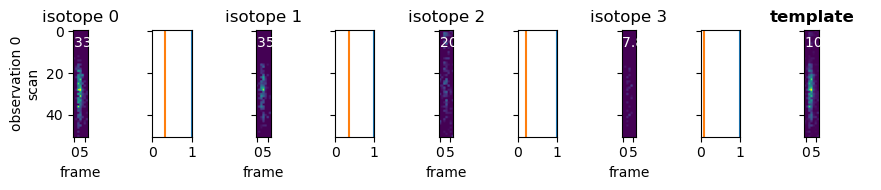

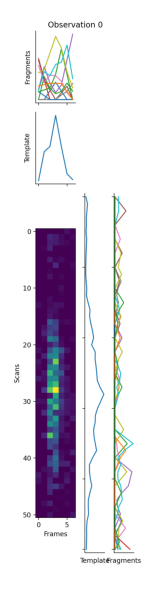

100%|██████████| 10/10 [00:17<00:00,  1.75s/it]


In [61]:

candidate_scoring = plexscoring.CandidateScoring(
    dia_data,
    reference_flat,
    fragments_flat,
    rt_column='rt_calibrated',
    mobility_column='mobility_calibrated',
    precursor_mz_column='mz_calibrated',
    fragment_mz_column='mz_calibrated',
)

candidate_scoring(candidates_df, thread_count=10, debug=True)

In [55]:
candidates_df


elution_group_idx  score_group_idx  precursor_idx  rank     score  \
0                      0                0              0     0  3.893613   
6347                3180             6360              1     0  5.498582   
26994              13549            27098              9     0  4.862525   
26995              13549            27099             11     0  3.682403   
64713              32477            64954             12     0  3.441075   
...                  ...              ...            ...   ...       ...   
83865              42088            84176         229320     0  3.975422   
11517               5785            11570         229323     0  8.447838   
11524               5788            11577         229325     0  3.933766   
11523               5788            11576         229327     0  2.864334   
11518               5785            11571         229332     0  5.395723   

       precursor_mz  decoy  channel  scan_center  scan_start  ...  \
0        402.237335      0        0          825         799  ...   
6347     376.239655      0        0          782         757  ...   
26994    500.238434      0        0          677         662  ...   
26995    500.238434      1        0          637         626  ...   
64713    409.210510      1        0          779         756  ...   
...             ...    ...      ...          ...         ...  ...   
83865   1129.339355      1        0           82          61  ...   
11517    746.160217      0        0          381         364  ...   
11524    939.458069      1        0          288         280  ...   
11523    932.450195      0        0          312         303  ...   
11518    751.766541      1        0          378         368  ...   

       mobility_calibrated  flat_frag_start_idx  flat_frag_stop_idx  charge  \
0                 0.776018                    0                   6       2   
6347              0.785001                40303               40310       2   
26994             0.855633               171573              171580       2   
26995             0.855633              2335673             2335680       2   
64713             0.814842              2329801             2329808       2   
...                    ...                  ...                 ...     ...   
83865             1.248955              2909793             2909814       4   
11517             1.057821                73697               73716       5   
11524             1.082996              2909814             2909846       4   
11523             1.082996                73755               73787       4   
11518             1.057821              2909846             2909865       5   

            i_0       i_1       i_2       i_3       i_4       i_5  
0      0.624179  0.285548  0.074148  0.014007  0.002118  0.000000  
6347   0.646165  0.274394  0.066189  0.011620  0.001632  0.000000  
26994  0.564454  0.308615  0.099050  0.023408  0.004473  0.000000  
26995  0.564454  0.308615  0.099050  0.023408  0.004473  0.000000  
64713  0.583646  0.278371  0.103103  0.027866  0.005960  0.001054  
...         ...       ...       ...       ...       ...       ...  
83865  0.082999  0.196205  0.242358  0.207442  0.137843  0.075598  
11517  0.141394  0.260841  0.256465  0.177225  0.096112  0.043393  
11524  0.141394  0.260841  0.256465  0.177225  0.096112  0.043393  
11523  0.141394  0.260841  0.256465  0.177225  0.096112  0.043393  
11518  0.141394  0.260841  0.256465  0.177225  0.096112  0.043393  

[91382 rows x 29 columns]

In [16]:
from alphadia.extraction import plexscoring, utils
import alphatims.utils

score_group_container = plexscoring.ScoreGroupContainer()
score_group_container.build_from_df(
    candidates_df['elution_group_idx'].values.astype(np.uint32),
    candidates_df['score_group_idx'].values.astype(np.uint32),
    candidates_df['precursor_idx'].values.astype(np.uint32),
    candidates_df['channel'].values.astype(np.uint8),
    candidates_df['flat_frag_start_idx'].values.astype(np.uint32),
    candidates_df['flat_frag_stop_idx'].values.astype(np.uint32),

    candidates_df['scan_start'].values,
    candidates_df['scan_stop'].values,
    candidates_df['scan_center'].values,
    candidates_df['frame_start'].values,
    candidates_df['frame_stop'].values,
    candidates_df['frame_center'].values,

    candidates_df['charge'].values,
    candidates_df['mz_calibrated'].values.astype(np.float32),
    candidates_df[utils.get_isotope_column_names(candidates_df.columns)].values.astype(np.float32),
)

q = quadrupole.SimpleQuadrupole(dia_data.cycle)
fragment_container = plexscoring.assemble_fragments(fragments_flat)

config = plexscoring.CandidateConfig()
config.max_cardinality = 1
config.score_grouped = True

alphatims.utils.set_threads(10)

plexscoring._executor(
    range(len(score_group_container)), 
    score_group_container,
    fragment_container,
    dia_data,
    config.jitclass(),
    q.jit,
    False
)

100%|██████████| 91382/91382 [00:16<00:00, 5399.33it/s]


In [17]:
from tqdm import tqdm

dict_list = []
precursor_idx_list = []
channel_list = []


for elem in tqdm(score_group_container):
    for i, candidate in enumerate(elem.candidates):
        if len(candidate.features) > 0:
            
            precursor_idx_list.append(candidate.precursor_idx)
            dict_list.append(candidate.features)
            channel_list.append(candidate.channel)

df = pd.DataFrame(dict_list)
df['precursor_idx'] = precursor_idx_list
df['channel'] = channel_list

df = df.merge(
    precursors_flat[['precursor_idx', 'decoy', 'proteins','elution_group_idx']],
    on='precursor_idx',
    how='left'
)


100%|██████████| 91382/91382 [00:01<00:00, 45849.60it/s]


In [51]:
df[['precursor_idx', 'channel', 'decoy', 'proteins', 'elution_group_idx']]

Index(['base_width_mobility', 'base_width_rt', 'cycle_fwhm',
       'diff_b_y_ion_intensity', 'fragment_frame_correlation',
       'fragment_scan_correlation', 'height_correlation', 'height_fraction',
       'height_fraction_weighted', 'intensity_correlation',
       'intensity_fraction', 'intensity_fraction_weighted',
       'isotope_height_correlation', 'isotope_intensity_correlation',
       'mean_observation_score', 'mobility_fwhm', 'mobility_observed',
       'mono_ms1_height', 'mono_ms1_intensity', 'mz_library', 'mz_observed',
       'n_observations', 'rt_observed', 'sum_b_ion_intensity',
       'sum_ms1_height', 'sum_ms1_intensity', 'sum_y_ion_intensity',
       'template_frame_correlation', 'template_scan_correlation',
       'top3_frame_correlation', 'top3_scan_correlation', 'top_ms1_height',
       'top_ms1_intensity', 'weighted_mass_deviation', 'weighted_mass_error',
       'weighted_ms1_height', 'weighted_ms1_intensity', 'precursor_idx',
       'channel', 'decoy', 'proteins

In [52]:
fdr_columns = ['base_width_mobility', 'base_width_rt', 'cycle_fwhm',
       'diff_b_y_ion_intensity', 'fragment_frame_correlation',
       'fragment_scan_correlation', 'height_correlation', 'height_fraction',
       'height_fraction_weighted', 'intensity_correlation',
       'intensity_fraction', 'intensity_fraction_weighted',
       'isotope_height_correlation', 'isotope_intensity_correlation',
       'mean_observation_score', 'mobility_fwhm', 'mobility_observed',
       'mono_ms1_height', 'mono_ms1_intensity', 'mz_library', 'mz_observed',
       'n_observations', 'rt_observed', 'sum_b_ion_intensity',
       'sum_ms1_height', 'sum_ms1_intensity', 'sum_y_ion_intensity',
       'template_frame_correlation', 'template_scan_correlation',
       'top3_frame_correlation',
       'top3_scan_correlation', 'top_ms1_height',
       'top_ms1_intensity', 'weighted_mass_deviation', 'weighted_mass_error',
       'weighted_ms1_height', 'weighted_ms1_intensity']

In [53]:
for col in fdr_columns:
    # count NaNs and infinities
    nan_count = df[col].isna().sum()
    inf_count = np.isinf(df[col]).sum()
    # replace infinities with NaNs
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)
    print(f'{col}: {nan_count} NaNs, {inf_count} infinities')

base_width_mobility: 0 NaNs, 0 infinities
base_width_rt: 0 NaNs, 0 infinities
cycle_fwhm: 0 NaNs, 0 infinities
diff_b_y_ion_intensity: 0 NaNs, 0 infinities
fragment_frame_correlation: 0 NaNs, 0 infinities
fragment_scan_correlation: 0 NaNs, 0 infinities
height_correlation: 5 NaNs, 0 infinities
height_fraction: 0 NaNs, 0 infinities
height_fraction_weighted: 0 NaNs, 0 infinities
intensity_correlation: 5 NaNs, 0 infinities
intensity_fraction: 0 NaNs, 0 infinities
intensity_fraction_weighted: 0 NaNs, 0 infinities
isotope_height_correlation: 18 NaNs, 0 infinities
isotope_intensity_correlation: 18 NaNs, 0 infinities
mean_observation_score: 0 NaNs, 0 infinities
mobility_fwhm: 0 NaNs, 0 infinities
mobility_observed: 0 NaNs, 0 infinities
mono_ms1_height: 0 NaNs, 0 infinities
mono_ms1_intensity: 0 NaNs, 0 infinities
mz_library: 0 NaNs, 0 infinities
mz_observed: 0 NaNs, 0 infinities
n_observations: 0 NaNs, 0 infinities
rt_observed: 0 NaNs, 0 infinities
sum_b_ion_intensity: 0 NaNs, 0 infinities
sum

(89650, 37)
(89650,)


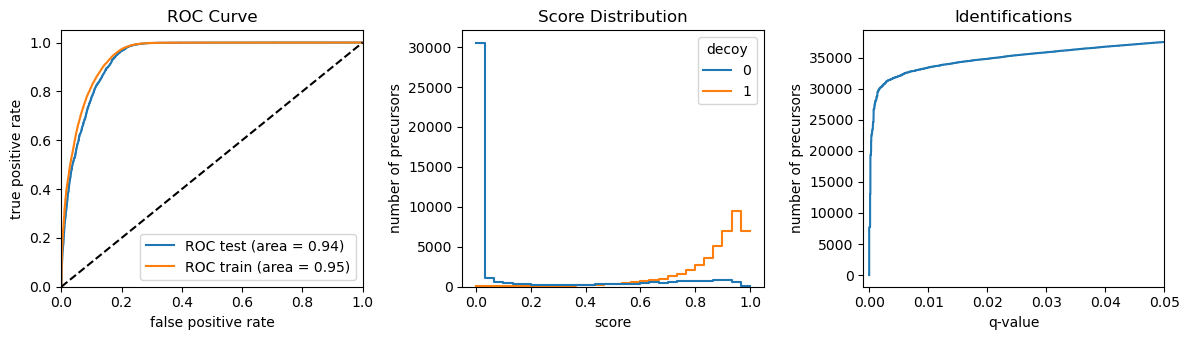

In [55]:
from alphadia.extraction import scoring

df_fdr = scoring.fdr_correction(df, feature_columns=fdr_columns, index_group='precursor_idx')

In [40]:
df_fdr

base_width_mobility  base_width_rt  cycle_fwhm  diff_b_y_ion_intensity  \
2868              0.040086       8.528353    7.197113               11.378868   
8145              0.036207       8.528944    6.322947               12.914328   
12730             0.034914      27.721546   21.253740               11.815945   
4995              0.036207      12.368119    8.599662               13.700927   
31368             0.036207      21.964968   14.524087               13.287211   
...                    ...            ...         ...                     ...   
31398             0.025862      16.206793    6.966141              -10.385852   
11795             0.029741       6.610048    1.599287               -1.197542   
2750              0.010345       6.610673    0.000000                0.000000   
2569              0.011638       6.609803    3.719803               -8.639765   
3209              0.031034       6.609666    4.786317              -10.766188   

       fragment_frame_correlation  fragment_scan_correlation  \
2868                     0.926858                   0.844987   
8145                     0.991633                   0.929488   
12730                    0.679472                   0.640748   
4995                     0.994901                   0.927122   
31368                    0.828978                   0.763062   
...                           ...                        ...   
31398                    0.223792                   0.213109   
11795                    0.012844                  -0.036226   
2750                     0.000000                   0.000000   
2569                    -0.128207                   0.044411   
3209                     0.176715                   0.096527   

       height_correlation  height_fraction  height_fraction_weighted  \
2868             0.990774         1.000000                  1.000000   
8145             0.912314         1.000000                  1.000000   
12730            0.886792         1.000000                  1.000000   
4995             0.996320         1.000000                  1.000000   
31368            0.812069         1.000000                  1.000000   
...                   ...              ...                       ...   
31398            0.445703         0.500000                  0.691843   
11795            0.088029         0.727273                  0.878517   
2750             0.000000         0.000000                  0.000000   
2569             0.530398         1.000000                  1.000000   
3209            -0.383468         1.000000                  1.000000   

       intensity_correlation  ...  weighted_mass_deviation  \
2868                0.996661  ...                -0.052145   
8145                0.943258  ...                 0.766772   
12730               0.999463  ...                -0.315317   
4995                0.997180  ...                -1.414243   
31368               0.874091  ...                 0.468384   
...                      ...  ...                      ...   
31398               0.038415  ...                -2.178152   
11795               0.157214  ...                 6.317471   
2750                0.000000  ...                 5.725267   
2569                0.828172  ...                -5.665408   
3209               -0.258727  ...                -7.798412   

       weighted_mass_error  weighted_ms1_height  weighted_ms1_intensity  \
2868              0.052145         22602.228516            1.322968e+07   
8145              0.766772         20450.816406            9.973633e+06   
12730             0.315317           365.689423            6.431659e+05   
4995              1.414243         13569.948242            1.312189e+07   
31368             0.468384           380.891602            6.106488e+05   
...                    ...                  ...                     ...   
31398             2.178152            47.201660            1.137885e+03   
11795             6.317471          7795.588867        

In [363]:
from alphadia.extraction import validate
class Multiplexer():

    def __init__(self,
        precursors_flat: pd.DataFrame,
        fragments_flat: pd.DataFrame,
        psm_df: pd.DataFrame,
        mz_column: str = 'mz_calibrated',
        ) -> None:

        self.precursors_flat = precursors_flat
        self.fragments_flat = fragments_flat
        self.psm_df = psm_df

        self.mz_column = mz_column

    def __call__(self):
        # make sure input psm's have all required columns
        self.psm_df = self.psm_df[self.psm_df['decoy'] == 0].copy()
        anchor_ids = self.psm_df[['elution_group_idx', 'scan_start' ,'scan_stop', 'scan_center', 'frame_start', 'frame_stop', 'frame_center','rank']]
        
        candidates_df = self.precursors_flat[(precursors_flat['decoy'] == 0)]
        candidates_df = candidates_df[candidates_df['elution_group_idx'].isin(anchor_ids['elution_group_idx'])]
        candidates_df = candidates_df[['precursor_idx', 'elution_group_idx', 'channel', 'decoy','flat_frag_start_idx','flat_frag_stop_idx','charge',self.mz_column]+utils.get_isotope_column_names(candidates_df.columns)]

        candidates_df = candidates_df.merge(anchor_ids, on='elution_group_idx', how='outer')
        candidates_df = candidates_df.sort_values('precursor_idx')
        validate.candidates(candidates_df)
        return candidates_df

In [352]:
df_d0.head(30000)['rank'].value_counts()

0    24010
1     3932
2     1423
3      513
4      122
Name: rank, dtype: int64

In [16]:
precursors_flat[precursors_flat['elution_group_idx'] == 14391][['elution_group_idx','precursor_idx','decoy','channel','sequence','mz_calibrated','charge']]

elution_group_idx  precursor_idx  decoy  channel    sequence  \
61276              14391          61507      1        0  SVRPGLSPSR   
61277              14391          61277      0        0  SIRPGLSPYR   
61505              14391          61276      0       12  SIRPGLSPYR   
61506              14391          61505      0        8  SIRPGLSPYR   
61507              14391          61506      0        4  SIRPGLSPYR   

       mz_calibrated  charge  
61276     361.874806       3  
61277     391.890695       3  
61505     395.914916       3  
61506     394.572171       3  
61507     393.232406       3

In [57]:
precursors_sample = precursors_flat[precursors_flat['precursor_idx'].isin([61277, 61507,42379])]

In [58]:
precursors_sample

elution_group_idx  precursor_idx  decoy  flat_frag_start_idx  \
42417               2734          42379      0                34647   
61276              14391          61507      1              2588507   
61277              14391          61277      0               182581   

       flat_frag_stop_idx  charge  rt_library  mobility_library  mz_library  \
42417               34655       2  897.429570          0.886747  535.790050   
61276             2588519       3  655.292295          0.770913  361.880490   
61277              182593       3  655.292295          0.770913  391.896142   

         sequence  ...       i_1       i_2       i_3       i_4       i_5  nAA  \
42417   DLPNALDEK  ...  0.311581  0.104404  0.025857  0.005194  0.000000    9   
61276  SVRPGLSPSR  ...  0.330892  0.118996  0.030837  0.006372  0.001107   10   
61277  SIRPGLSPYR  ...  0.330892  0.118996  0.030837  0.006372  0.001107   10   

                                                raw_name  mz_calibrated  \
42417  20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...     535.785703   
61276  20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...     361.874806   
61277  20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2sca...     391.890695   

       rt_calibrated  mobility_calibrated  
42417    1017.108243             0.874581  
61276     719.325460             0.776596  
61277     719.325460             0.776596  

[3 rows x 24 columns]

0:38:18.082270  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:38:18.082740  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:38:18.082996  INFO: FWHM in RT is 5.00 seconds, sigma is 1.87
0:38:18.083217  INFO: FWHM in mobility is 0.010 1/K_0, sigma is 13.14
0:38:18.094776  INFO: starting candidate selection


3


  0%|          | 0/3 [00:00<?, ?it/s]

plotting candidates: 42379


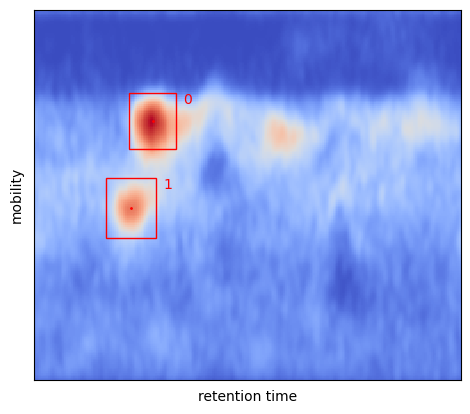

plotting candidates: 61277


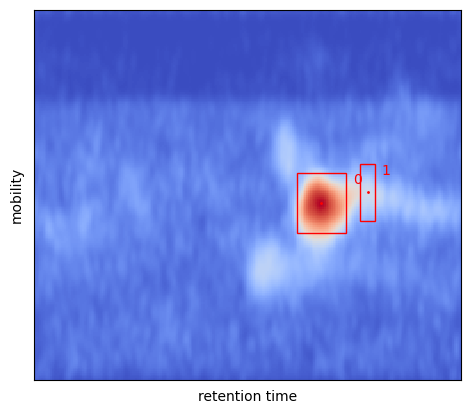

 67%|██████▋   | 2/3 [00:00<00:00, 12.40it/s]

plotting candidates: 61507


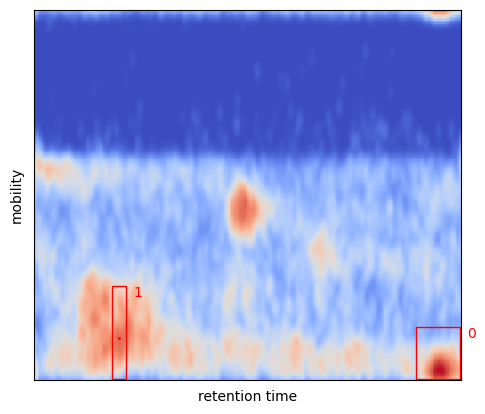

100%|██████████| 3/3 [00:00<00:00, 12.09it/s]


In [59]:
config = hybridselection.HybridCandidateConfig()
config.update(workflow.config['extraction']['HybridCandidateConfig'])
config.update({
    'rt_tolerance': 40,
    'mobility_tolerance': 0.07,
    'candidate_count': 1,
    'precursor_mz_tolerance': 10,
    'fragment_mz_tolerance': 15,
    'sigma_scale_mobility': 2.,
    'sigma_scale_rt': 0.3,
    'candidate_count': 2,
    'center_fraction': 0.5,
    'max_cardinality':10,
    
})

extraction = hybridselection.HybridCandidateSelection(
    dia_data,
    precursors_sample,
    fragments_flat,
    config.jitclass(),
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    fwhm_rt = 5.,
    fwhm_mobility = 0.01,
    thread_count=10,
    debug=True
)
egs, candidates_df = extraction()

  0%|          | 0/6 [00:00<?, ?it/s]

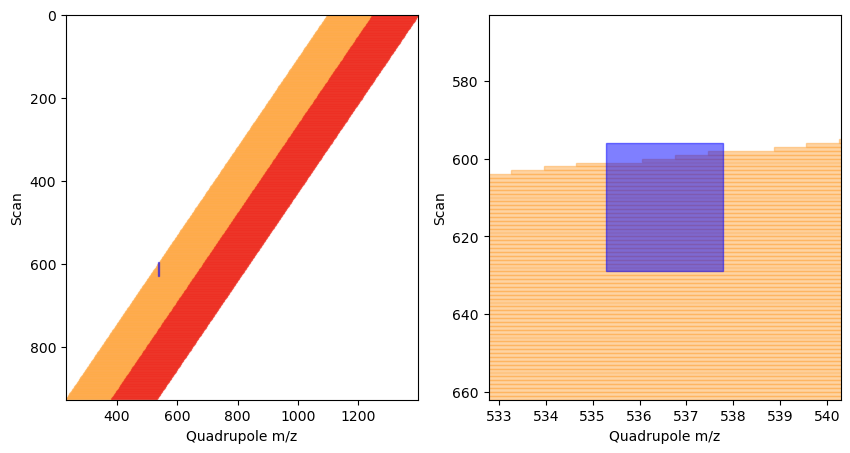

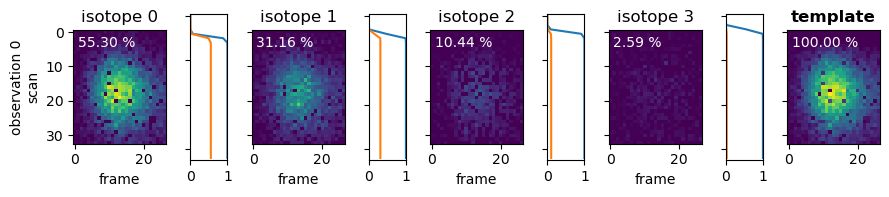

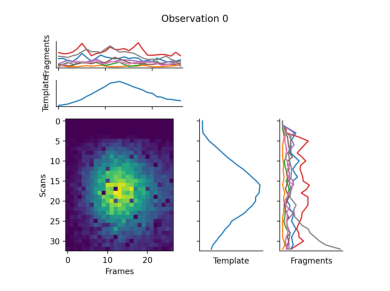

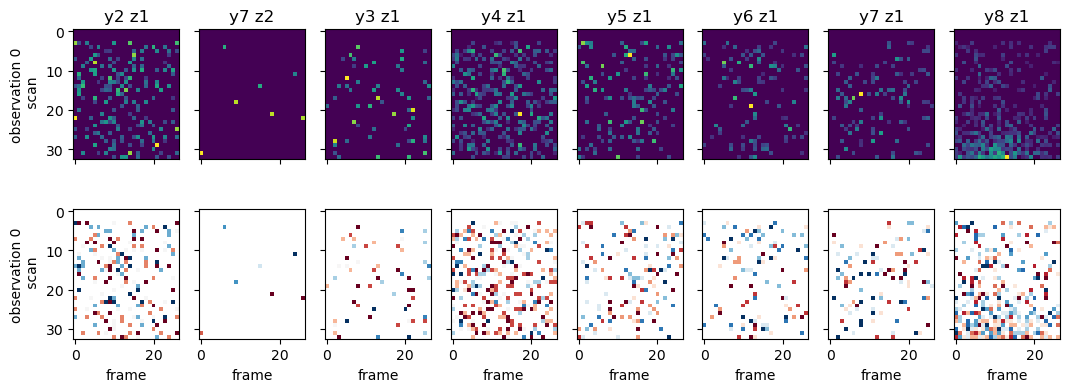

 17%|█▋        | 1/6 [00:23<01:57, 23.48s/it]

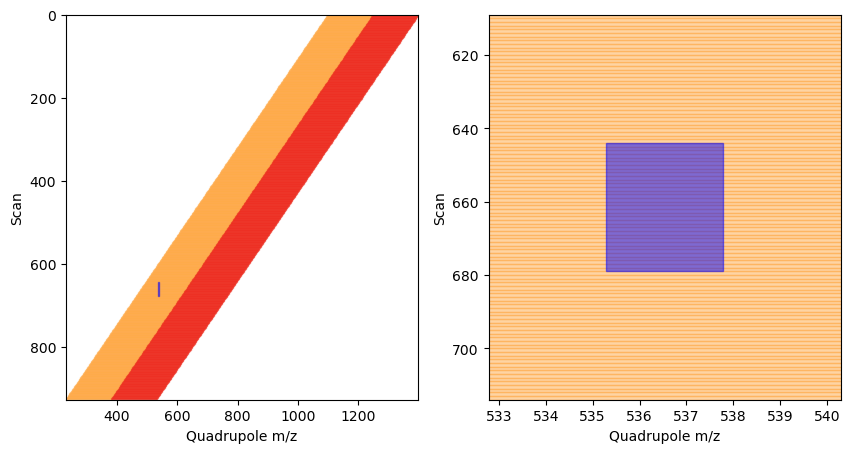

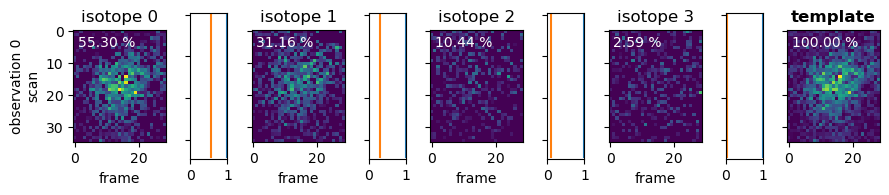

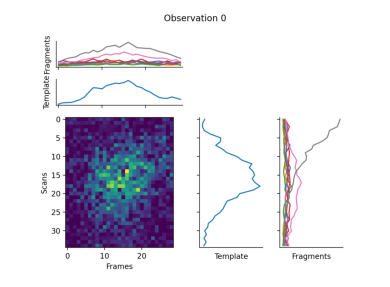

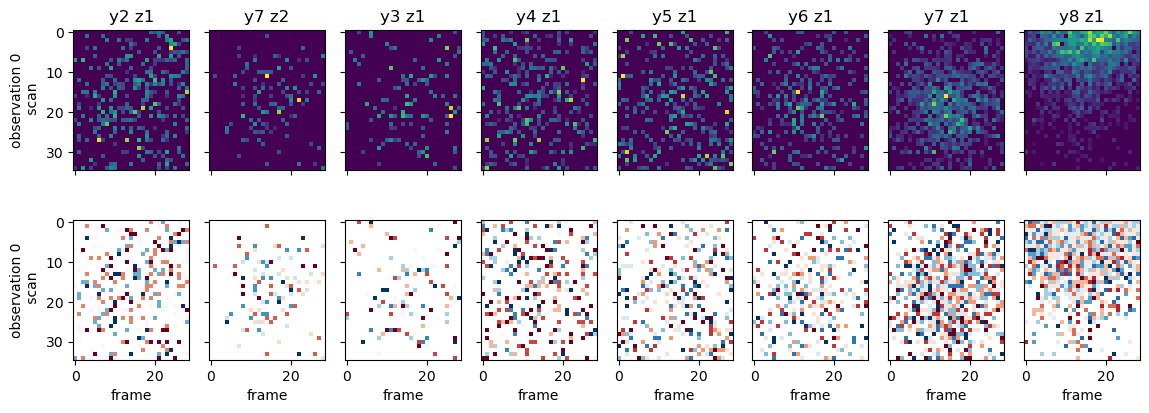

 33%|███▎      | 2/6 [00:26<00:45, 11.37s/it]

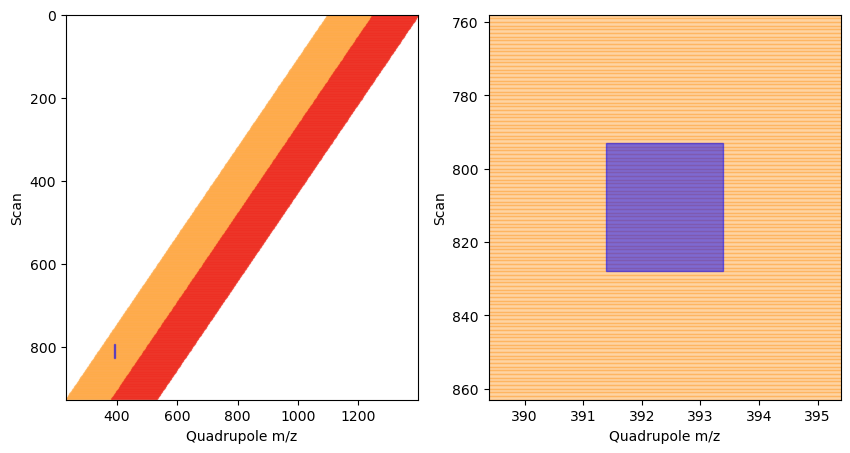

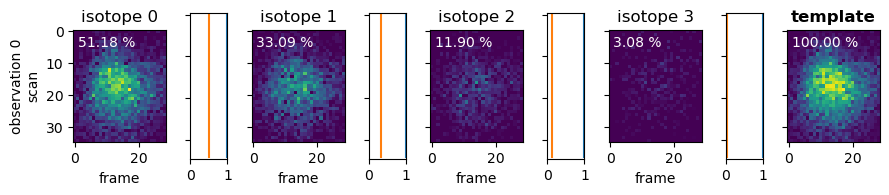

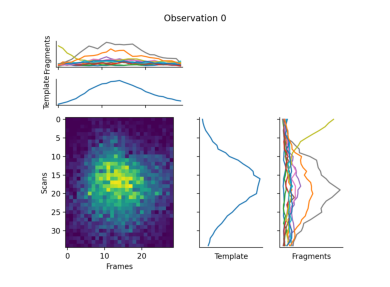

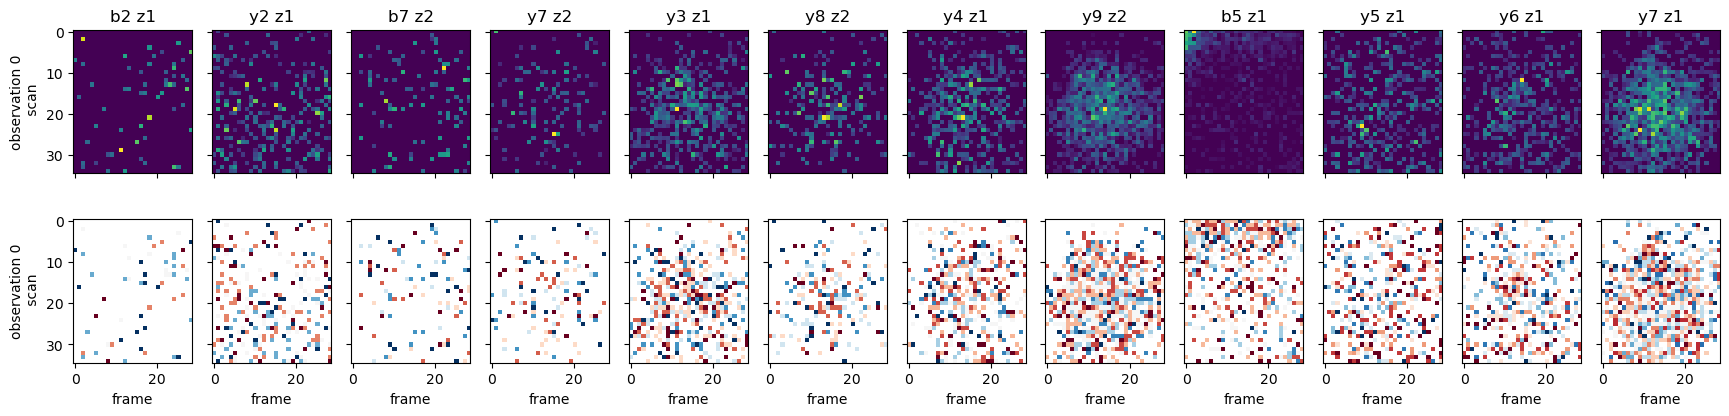

 50%|█████     | 3/6 [00:29<00:23,  7.78s/it]

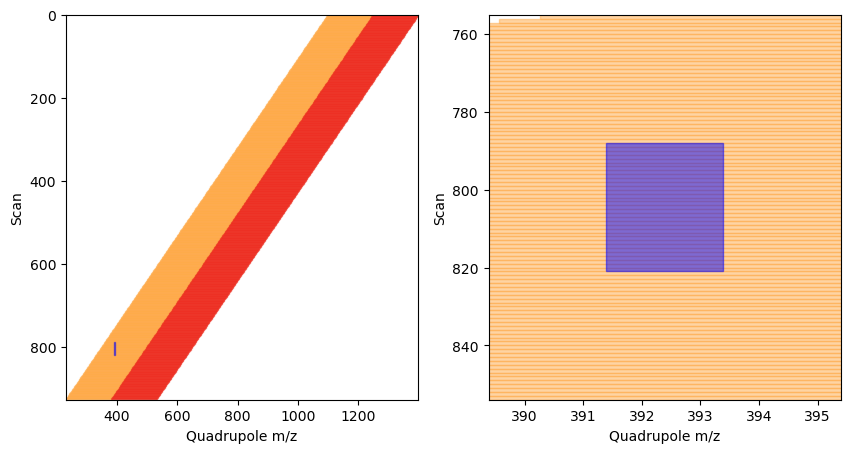

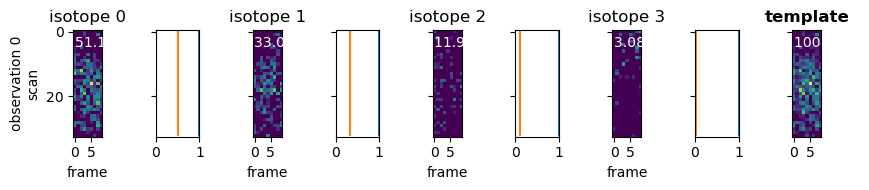

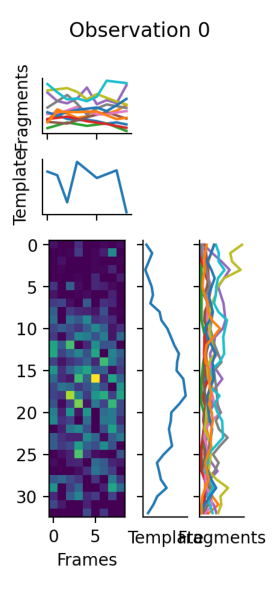

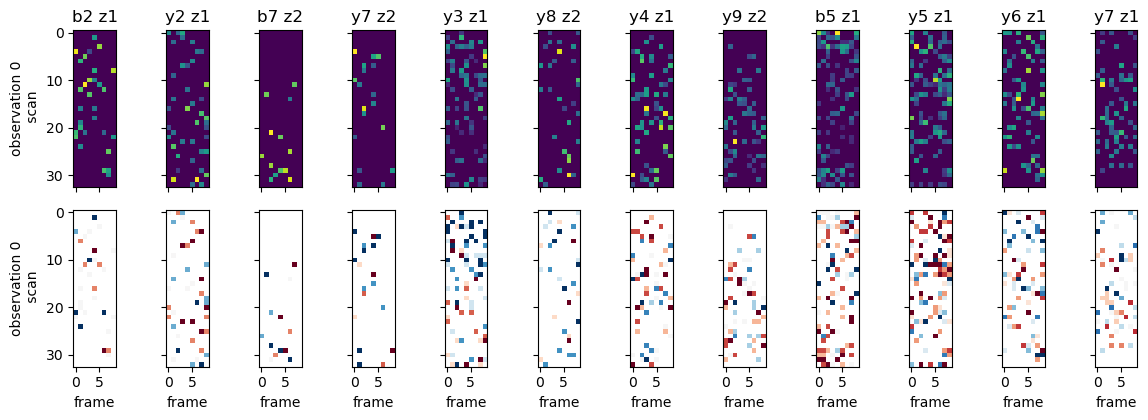

 67%|██████▋   | 4/6 [00:32<00:11,  5.91s/it]

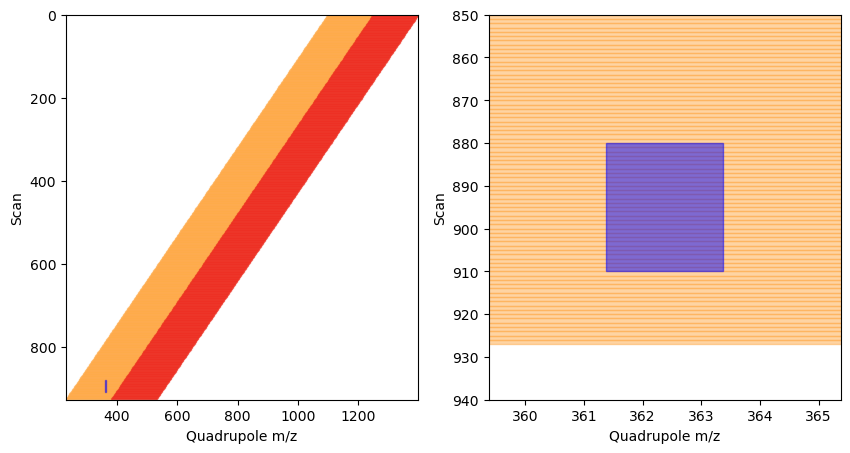

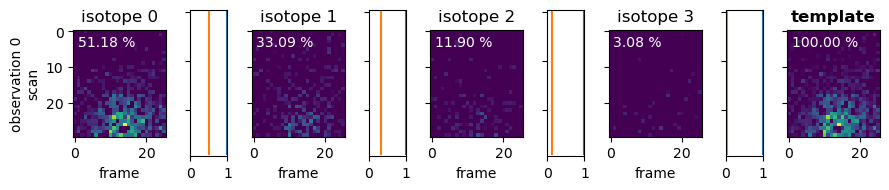

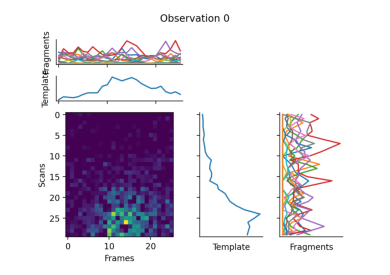

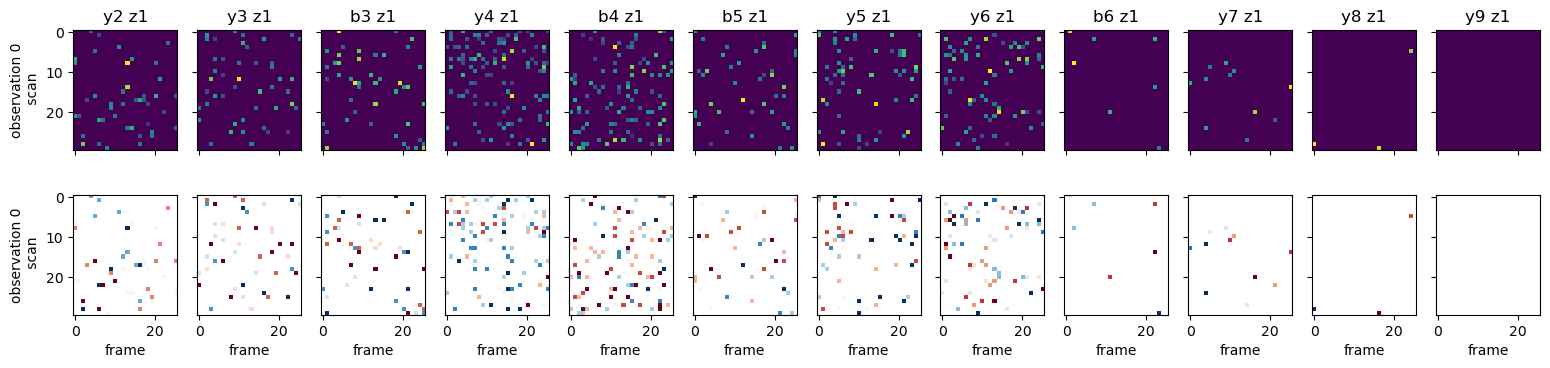

 83%|████████▎ | 5/6 [00:35<00:04,  4.88s/it]

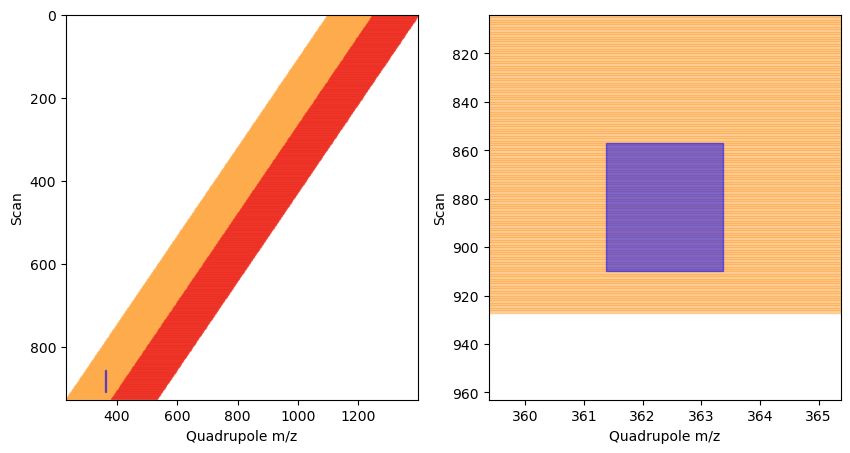

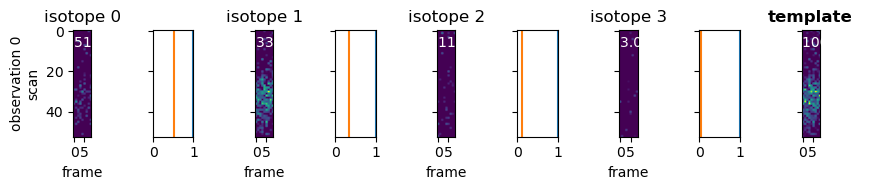

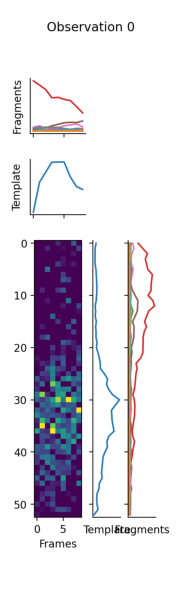

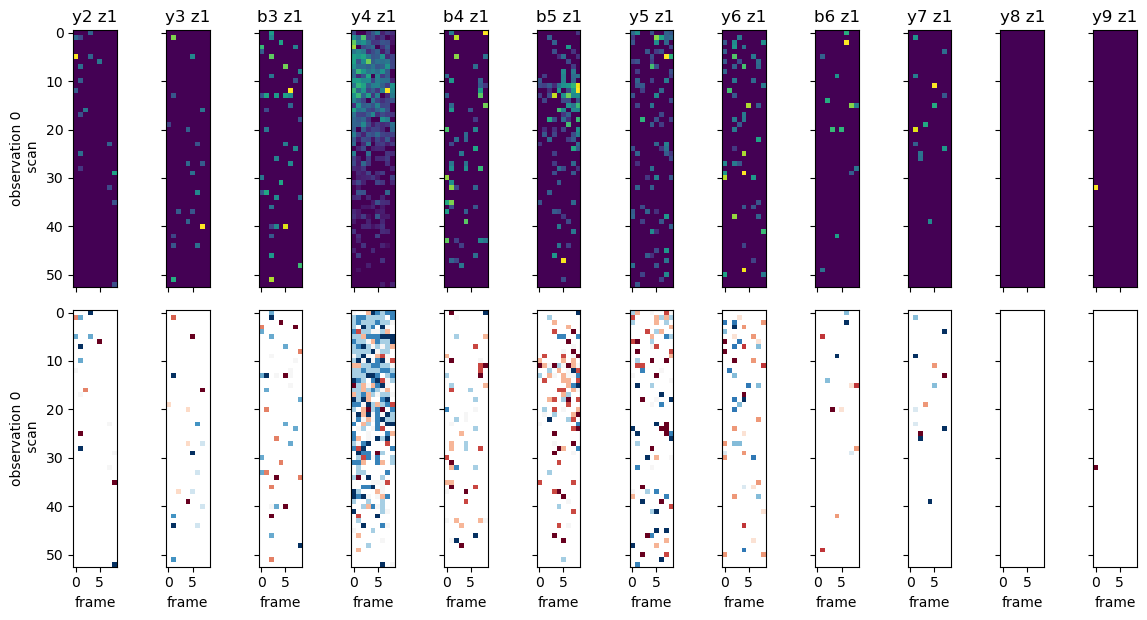

100%|██████████| 6/6 [00:00<00:00, 197.09it/s]
0:39:06.939530  INFO: Scored 6 candidates
0:39:06.941195  INFO: 0.00% of targets failed, 0.00% of decoys failed


In [60]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

scoring_workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates_df,
    q,
    precursor_mz_tolerance=10,
    fragment_mz_tolerance=15,
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=True
)
container, psm, fragments = scoring_workflow()

In [364]:
multiplex = Multiplexer(precursors_flat, fragments_flat, psm[psm['rank'] == 0].copy())
candidates_df = multiplex()

In [370]:
candidates_df.columns

Index(['precursor_idx', 'elution_group_idx', 'channel', 'decoy',
       'flat_frag_start_idx', 'flat_frag_stop_idx', 'charge', 'mz_calibrated',
       'i_0', 'i_1', 'i_2', 'i_3', 'i_4', 'i_5', 'scan_start', 'scan_stop',
       'scan_center', 'frame_start', 'frame_stop', 'frame_center', 'rank',
       'score_group_idx'],
      dtype='object')

In [365]:
from alphadia.extraction import utils

In [366]:
candidates_df = utils.calculate_score_groups(candidates_df, True).copy()

In [367]:
candidates_df.columns

Index(['precursor_idx', 'elution_group_idx', 'channel', 'decoy',
       'flat_frag_start_idx', 'flat_frag_stop_idx', 'charge', 'mz_calibrated',
       'i_0', 'i_1', 'i_2', 'i_3', 'i_4', 'i_5', 'scan_start', 'scan_stop',
       'scan_center', 'frame_start', 'frame_stop', 'frame_center', 'rank',
       'score_group_idx'],
      dtype='object')

In [368]:
fragments_exclusive = fragments_flat.copy()
fragments_exclusive.loc[fragments_exclusive['cardinality'] > 1, 'mz_calibrated'] = 0

In [66]:
import numba as nb

In [166]:
def assemble_fragments(fragments_flat, fragment_mz_column='mz_calibrated'):
            
    # set cardinality to 1 if not present
    if 'cardinality' in fragments_flat.columns:
        pass
    
    else:
        logging.warning('Fragment cardinality column not found in fragment dataframe. Setting cardinality to 1.')
        fragments_flat['cardinality'] = np.ones(len(fragments_flat), dtype=np.uint8)
    
    # validate dataframe schema and prepare jitclass compatible dtypes
    validate.fragments_flat(fragments_flat)

    return fragments.FragmentContainer(
        fragments_flat['mz_library'].values,
        fragments_flat[fragment_mz_column].values,
        fragments_flat['intensity'].values,
        fragments_flat['type'].values,
        fragments_flat['loss_type'].values,
        fragments_flat['charge'].values,
        fragments_flat['number'].values,
        fragments_flat['position'].values,
        fragments_flat['cardinality'].values
    )

In [429]:
from alphadia.extraction.numba import config

@nb.experimental.jitclass()
class CandidateConfigJIT:
     
    score_grouped: nb.boolean
    decoy_channel: nb.uint8
    max_cardinality: nb.uint8
    top_k_fragments: nb.uint32

    def __init__(self,
            score_grouped: nb.boolean,
            decoy_channel: nb.uint8,
            max_cardinality: nb.uint8,
            top_k_fragments: nb.uint32
        ) -> None:

        self.score_grouped = score_grouped
        self.decoy_channel = decoy_channel
        self.max_cardinality = max_cardinality
        self.top_k_fragments = top_k_fragments

candidate_config_type = CandidateConfigJIT.class_type.instance_type

class CandidateConfig(config.JITConfig):

    jit_container = CandidateConfigJIT

    def __init__(self):
        self.score_grouped = True
        self.decoy_channel = 0
        self.max_cardinality = 10
        self.top_k_fragments = 16

@nb.experimental.jitclass()
class Candidate:

    # input columns
    precursor_idx: nb.uint32
    channel: nb.uint8

    frag_start_idx: nb.uint32
    frag_stop_idx: nb.uint32

    scan_start: nb.uint32
    scan_stop: nb.uint32
    scan_center: nb.uint32
    frame_start: nb.uint32
    frame_stop: nb.uint32
    frame_center: nb.uint32

    charge: nb.uint8
    precursor_mz: nb.float32
    isotope_intensity: nb.float32[::1]
    
    #calculated columns
    isotope_mz: nb.float32[::1]

    def __init__(
            self,
            precursor_idx: nb.uint32,
            channel: nb.uint8,

            frag_start_idx: nb.uint32,
            frag_stop_idx: nb.uint32,

            scan_start: nb.uint32,
            scan_stop: nb.uint32,
            scan_center: nb.uint32,
            frame_start: nb.uint32,
            frame_stop: nb.uint32,
            frame_center: nb.uint32,

            charge: nb.uint8,
            precursor_mz: nb.float32,
            #isotope_intensity: nb.float32[::1]
        ) -> None:

        self.precursor_idx = precursor_idx
        self.channel = channel

        self.frag_start_idx = frag_start_idx
        self.frag_stop_idx = frag_stop_idx

        self.scan_start = scan_start
        self.scan_stop = scan_stop
        self.scan_center = scan_center
        self.frame_start = frame_start
        self.frame_stop = frame_stop
        self.frame_center = frame_center

        self.charge = charge
        self.precursor_mz = precursor_mz
        #self.isotope_intensity = isotope_intensity

    def __str__(self):
        string = 'Candidate Object ('
        string += 'precursor_idx: ' + str(self.precursor_idx)
        string += ', channel: ' + str(self.channel) + ')'
        return string

    def process(
        self,
        fragment_container,
        config
    ) -> None:
        fragments = fragment_container.slice(np.array([[self.frag_start_idx, self.frag_stop_idx, 1]]))

        fragments.filter_by_cardinality(config.max_cardinality)
        fragments.filter_top_k(config.top_k_fragments)
        fragments.sort_by_mz()


candidate_type = Candidate.class_type.instance_type

@nb.experimental.jitclass()
class ScoreGroup:
    elution_group_idx: nb.uint32
    score_group_idx: nb.uint32

    candidates: nb.types.ListType(candidate_type)

    def __init__(self,
            elution_group_idx: nb.uint32,
            score_group_idx: nb.uint32
        ) -> None:

        self.elution_group_idx = elution_group_idx
        self.score_group_idx = score_group_idx

        self.candidates = nb.typed.List.empty_list(candidate_type)

    def __getitem__(self, idx):
            return self.candidates[idx]

    def __len__(self):
        return len(self.candidates)
    
    def process(
        self,
        fragment_container,
        config
    ) -> None:
        

        for candidate in self.candidates:
            candidate.process(
                fragment_container,
                config
                )

        print(self.elution_group_idx)
        print(fragment_container)
        pass
    
score_group_type = ScoreGroup.class_type.instance_type

@nb.experimental.jitclass()
class ScoreGroupContainer:
        
        """
        Container for managing the scoring of precursors with defined boundaries.

        The `ScoreGroupContainer` contains all precursors that are to be scored.
        It consists of a list of `ScoreGroup` objects, which in turn contain a list of `Candidate` objects.

        For single channel experiments, each `ScoreGroup` contains a single `Candidate` object.
        For multi channel experiments, each `ScoreGroup` contains a `Candidate` object for each channel, including decoy channels.

        Structure:
        ```
        ScoreGroupContainer
            ScoreGroup
                Candidate
                Candidate
            ScoreGroup
                Candidate
                Candidate
        ```

        The `ScoreGroupContainer` is initialized by passing the validated columns of a candidate dataframe to the `build_from_df` method.

        
        Attributes
        ----------

        score_groups : nb.types.ListType(score_group_type)
            List of score groups.

        """
    
        score_groups: nb.types.ListType(score_group_type)
    
        def __init__(
                self,
            ) -> None:

            """
            Initialize the `ScoreGroupContainer` object without any score groups.
            """

            self.score_groups = nb.typed.List.empty_list(score_group_type)

        def __getitem__(self, idx):
            """
            Get a score group by index.
            """

            return self.score_groups[idx]

        def __len__(self):
            """
            Get the number of score groups.
            """
            return len(self.score_groups)
        
        def build_from_df(
            self,
            elution_group_idx : nb.uint32,
            score_group_idx : nb.uint32,
            precursor_idx : nb.uint32,
            channel : nb.uint8,
            flat_frag_start_idx : nb.uint32,
            flat_frag_stop_idx : nb.uint32,

            scan_start : nb.uint32,
            scan_stop : nb.uint32,
            scan_center : nb.uint32,
            frame_start : nb.uint32,
            frame_stop : nb.uint32,
            frame_center : nb.uint32,

            precursor_charge : nb.uint8,
            precursor_mz : nb.float32,
            precursor_isotopes : nb.float32[:,::1]
        ):
            
            """
            Build the `ScoreGroupContainer` from a candidate dataframe.
            All relevant columns of the candidate dataframe are passed to this method as numpy arrays.

            Note
            ----

            All columns of the candidate_df need to be validated for the correct type using the `extraction.validate.candidates` schema.
            columns musst be sorted by `score_group_idx` in ascending order.

            Parameters
            ----------

            """
            idx = 0
            current_score_group_idx = -1

            # iterate over all candidates
            # whenever a new score group is encountered, create a new score group
            for idx in range(len(score_group_idx)):

                if score_group_idx[idx] != current_score_group_idx:

                    print('created new score group at', idx)

                    self.score_groups.append(ScoreGroup(
                        elution_group_idx[idx],
                        score_group_idx[idx]
                    ))

                    # update current score group
                    current_score_group_idx = score_group_idx[idx]

                self.score_groups[-1].candidates.append(Candidate(
                    precursor_idx[idx],
                    channel[idx],
                    flat_frag_start_idx[idx],
                    flat_frag_stop_idx[idx],

                    scan_start[idx],
                    scan_stop[idx],
                    scan_center[idx],
                    frame_start[idx],
                    frame_stop[idx],
                    frame_center[idx],

                    precursor_charge[idx],
                    precursor_mz[idx]
                    #precursor_isotopes[idx].copy()
                ))

                idx += 1

        def collect_to_df(
            self,
        ):
            for score_group in self.score_groups:
                for candidate in score_group.candidates:
                    yield score_group.elution_group_idx, score_group.score_group_idx, candidate.precursor_idx, candidate.channel
        
@alphatims.utils.pjit()
def _executor(
        i,
        sg_container,
        fragment_container,
        config
    ):
    """
    Helper function.
    Is decorated with alphatims.utils.pjit to enable parallel execution of HybridElutionGroup.process.
    """

    sg_container[i].process(
        fragment_container,
        config
    )

import alphatims.utils

In [430]:
score_group_container = ScoreGroupContainer()

In [431]:
score_group_container.build_from_df(
    candidates_df['elution_group_idx'].values.astype(np.uint32),
    candidates_df['score_group_idx'].values.astype(np.uint32),
    candidates_df['precursor_idx'].values.astype(np.uint32),
    candidates_df['channel'].values.astype(np.uint8),
    candidates_df['flat_frag_start_idx'].values.astype(np.uint8),
    candidates_df['flat_frag_stop_idx'].values.astype(np.uint8),

    candidates_df['scan_start'].values,
    candidates_df['scan_stop'].values,
    candidates_df['scan_center'].values,
    candidates_df['frame_start'].values,
    candidates_df['frame_stop'].values,
    candidates_df['frame_center'].values,

    candidates_df['charge'].values,
    candidates_df['mz_calibrated'].values.astype(np.float32),
    candidates_df[utils.get_isotope_column_names(candidates_df.columns)].values.astype(np.float32),
)

created new score group at 0
created new score group at 4


In [432]:
utils.get_isotope_column_names(candidates_df.columns)

['i_0', 'i_1', 'i_2', 'i_3', 'i_4', 'i_5']

In [433]:
candidates_df[utils.get_isotope_column_names(candidates_df.columns)].values,

(array([[0.55296286, 0.31158148, 0.10440413, 0.02585711, 0.00519442,
         0.        ],
        [0.55296286, 0.31158148, 0.10440413, 0.02585711, 0.00519442,
         0.        ],
        [0.55296286, 0.31158148, 0.10440413, 0.02585711, 0.00519442,
         0.        ],
        [0.55296286, 0.31158148, 0.10440413, 0.02585711, 0.00519442,
         0.        ],
        [0.51179644, 0.33089152, 0.1189962 , 0.03083665, 0.00637175,
         0.00110744],
        [0.51179644, 0.33089152, 0.1189962 , 0.03083665, 0.00637175,
         0.00110744],
        [0.51179644, 0.33089152, 0.1189962 , 0.03083665, 0.00637175,
         0.00110744],
        [0.51179644, 0.33089152, 0.1189962 , 0.03083665, 0.00637175,
         0.00110744]]),)

In [434]:
from alphadia.extraction.numba import fragments

In [435]:
fragment_container = assemble_fragments(fragments_flat)

In [436]:
_executor(
    range(len(score_group_container)), 
    score_group_container,
    fragment_container,
    CandidateConfig().jitclass()
)
    

100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

2734
FragmentContainer with 2909997 fragments
14391
FragmentContainer with 2909997 fragments


In [437]:
for elem in score_group_container:
    for c in elem:
        print(c)

Candidate Object (precursor_idx: 42368, channel: 8)
Candidate Object (precursor_idx: 42379, channel: 0)
Candidate Object (precursor_idx: 42395, channel: 12)
Candidate Object (precursor_idx: 42417, channel: 4)
Candidate Object (precursor_idx: 61276, channel: 12)
Candidate Object (precursor_idx: 61277, channel: 0)
Candidate Object (precursor_idx: 61505, channel: 8)
Candidate Object (precursor_idx: 61506, channel: 4)


In [333]:
print(len(score_group_container))
for score_group in score_group_container:
    print(len(score_group))

2
4
4


In [334]:
for row in candidates_df.to_dict(orient='records'):
    print(row)
    break

{'precursor_idx': 42368, 'elution_group_idx': 2734, 'channel': 8, 'decoy': 0, 'flat_frag_start_idx': 1198613, 'flat_frag_stop_idx': 1198621, 'charge': 2, 'scan_start': 596, 'scan_stop': 629, 'scan_center': 612, 'frame_start': 8746, 'frame_stop': 8827, 'frame_center': 8785, 'rank': 0, 'score_group_idx': 0}


In [335]:
df.i

NameError: name 'df' is not defined

In [336]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

scoring_workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_exclusive,
    candidates_df,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=True
)
container, psm, fragments = scoring_workflow()

  0%|          | 0/8 [00:00<?, ?it/s]Exception in thread Thread-183:
Traceback (most recent call last):
  File "/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/numba/core/dispatcher.py", line 468, in _compile_for_args
    error_rewrite(e, 'typing')
  File "/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/numba/core/dispatcher.py", line 409, in error_rewrite
    raise e.with_traceback(None)
numba.core.errors.TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Failed in nopython mode pipeline (step: nopython frontend)
- Resolution failure for literal arguments:
Failed in nopython mode pipeline (step: native lowering)
Cannot cast instance.jitclass.FragmentContai

KeyboardInterrupt: 

In [49]:
container[0].

In [173]:
fragments_exclusive

mz_library  intensity  cardinality  type  loss_type  charge  number  \
0         628.377686   1.000000            4   121          0       1       6   
1         263.139008   0.015442            1    98          0       1       2   
2         541.345642   0.264511            4   121          0       1       5   
3         271.176453   0.030825            4   121          0       2       5   
4         345.224487   0.038848            4   121          0       1       3   
...              ...        ...          ...   ...        ...     ...     ...   
2909992  2087.022705   1.000000            1   121          0       1      18   
2909993  1985.974976   0.713498            1   121          0       1      17   
2909994  1928.953491   0.047048            1   121          0       1      16   
2909995  1829.885010   0.114307            1   121          0       1      15   
2909996  1714.858154   0.002081            1   121          0       1      14   

         position  mz_calibrated  
0               0       0.000000  
1               1     263.133179  
2               1       0.000000  
3               1       0.000000  
4               3       0.000000  
...           ...            ...  
2909992        28    2087.030518  
2909993        29    1985.981812  
2909994        30    1928.959717  
2909995        31    1829.890259  
2909996        32    1714.862305  

[2909997 rows x 9 columns]

  0%|          | 0/10 [00:00<?, ?it/s]

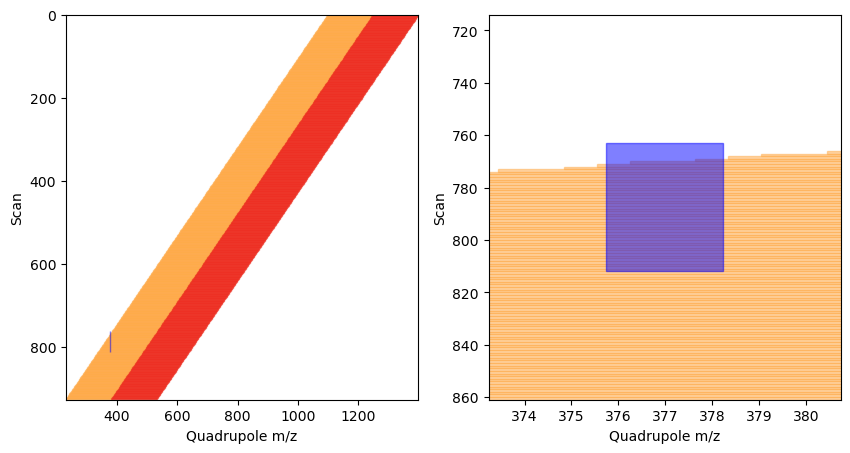

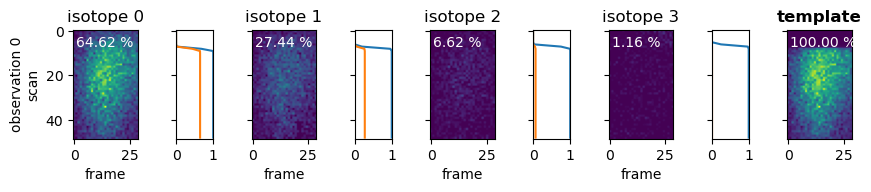

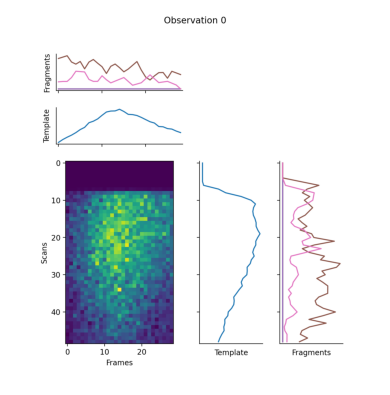

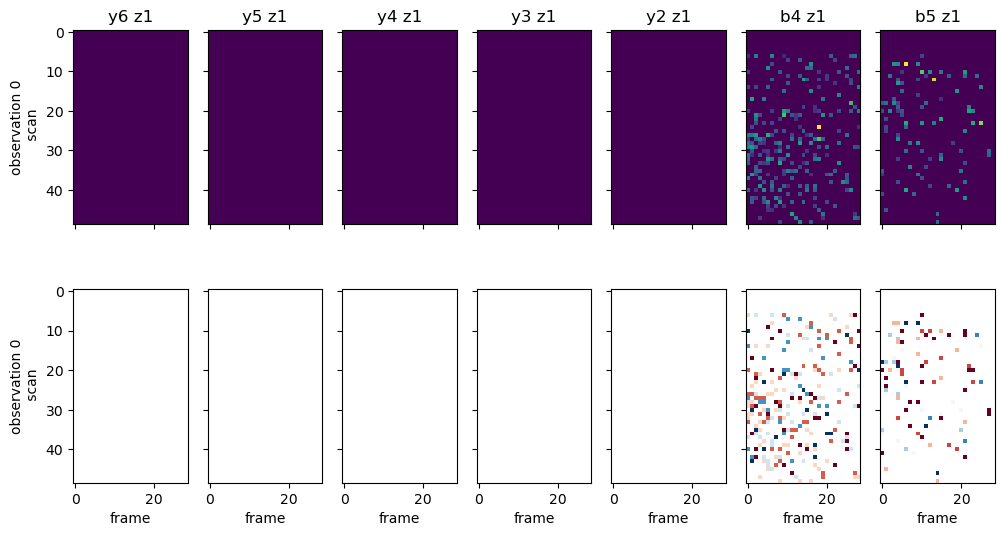

 10%|█         | 1/10 [00:03<00:29,  3.22s/it]

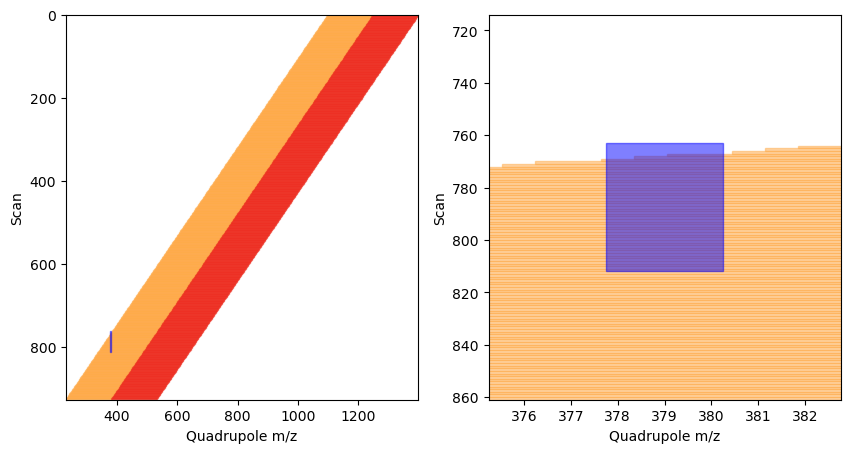

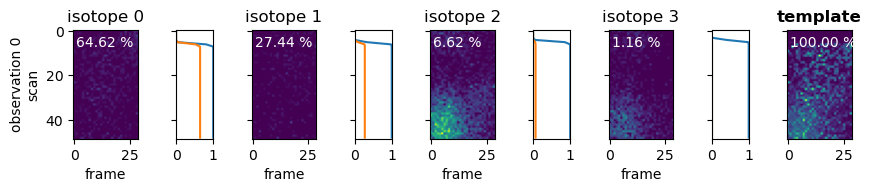

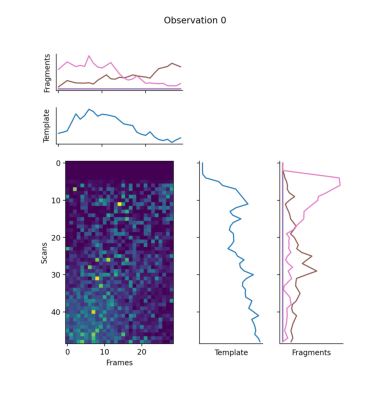

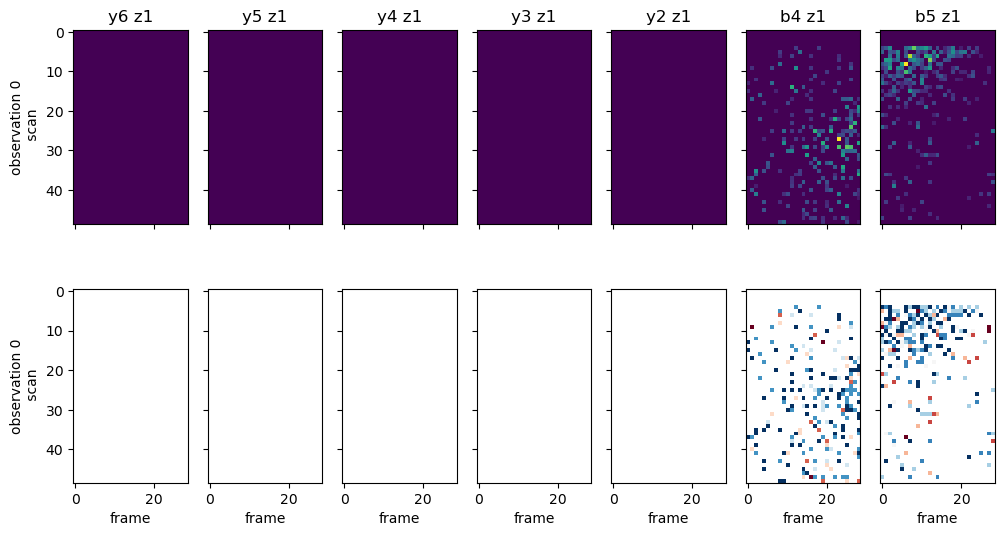

 20%|██        | 2/10 [00:06<00:26,  3.29s/it]

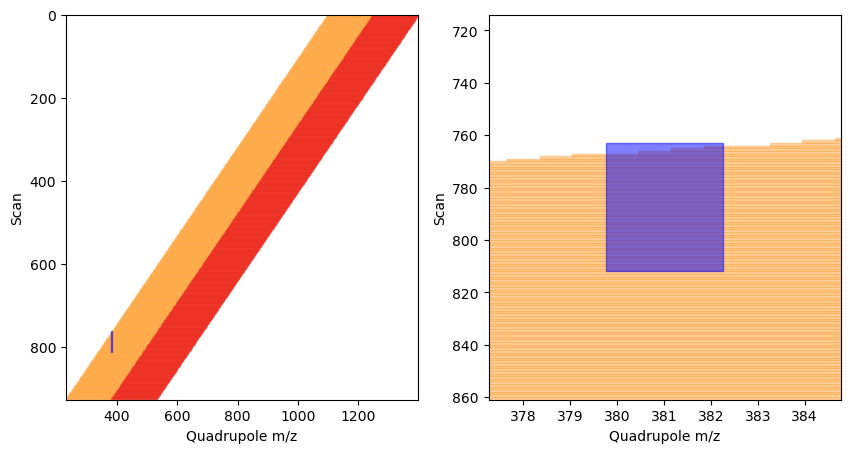

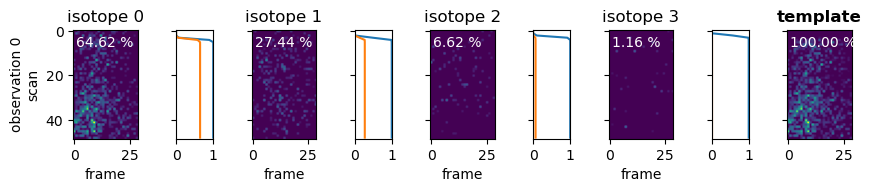

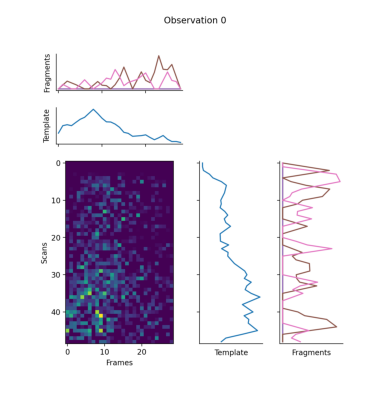

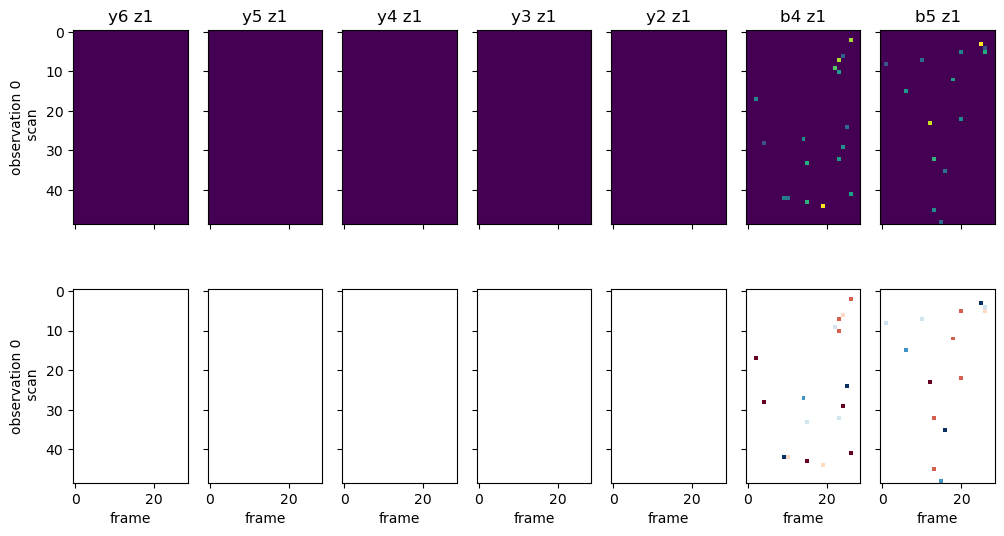

 30%|███       | 3/10 [00:09<00:20,  2.96s/it]

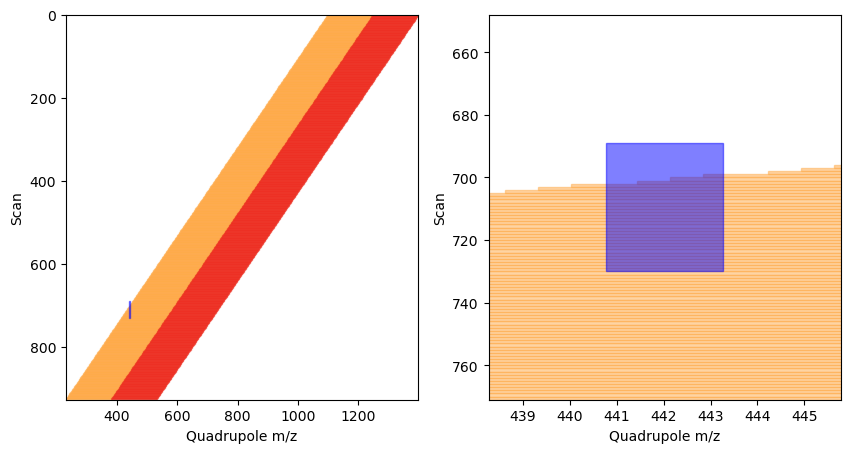

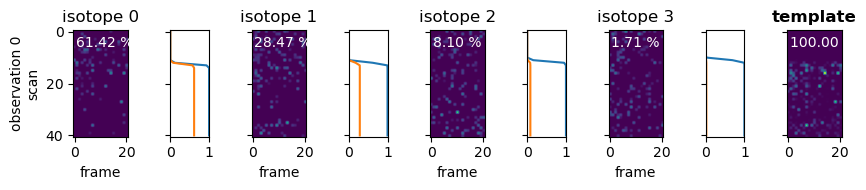

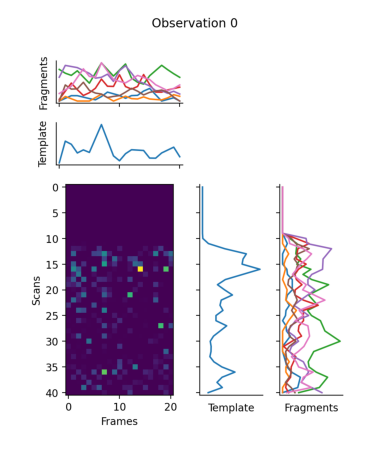

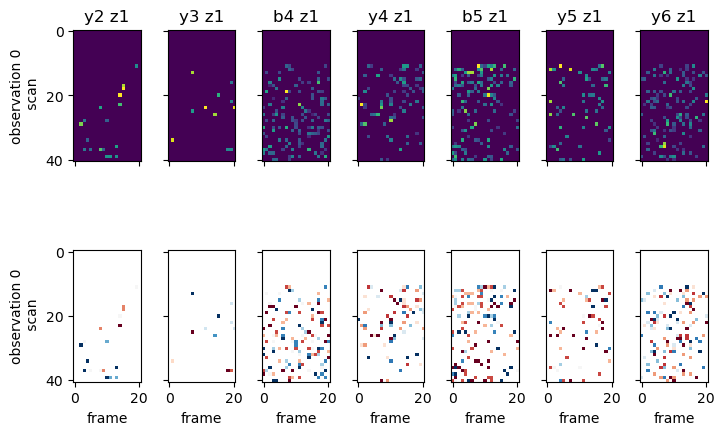

 40%|████      | 4/10 [00:12<00:18,  3.08s/it]

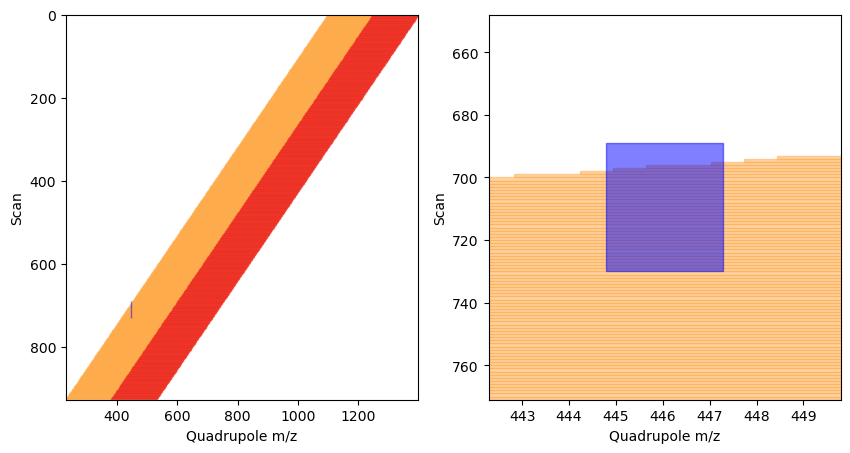

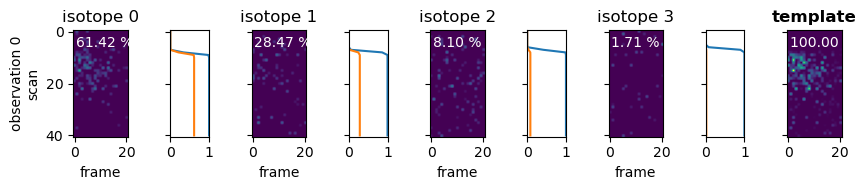

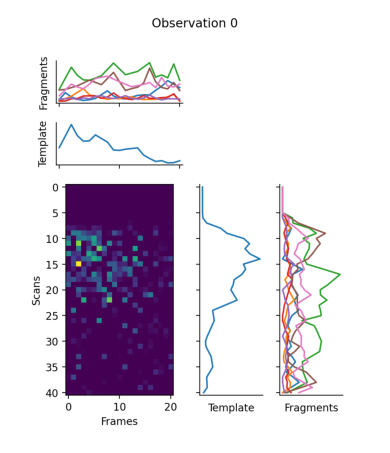

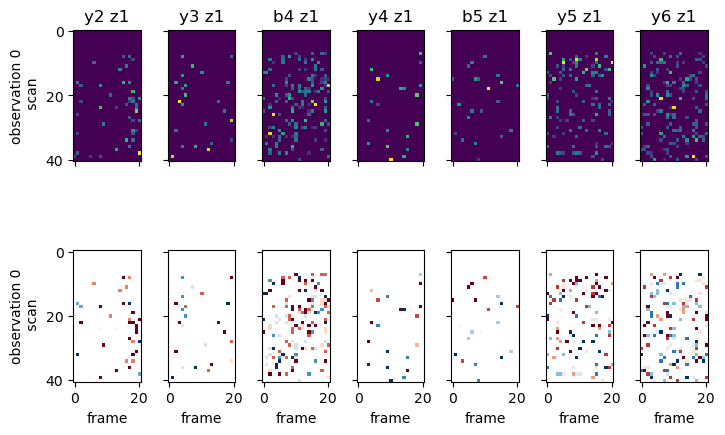

 50%|█████     | 5/10 [00:14<00:14,  2.85s/it]

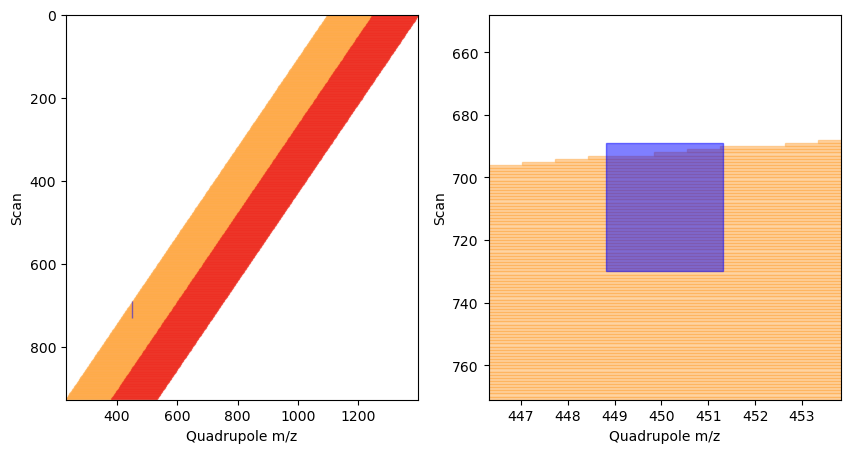

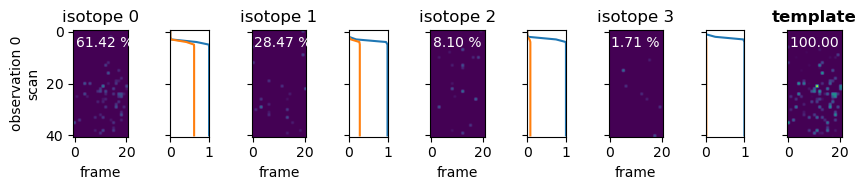

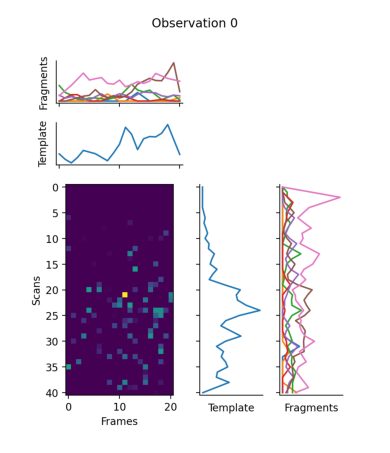

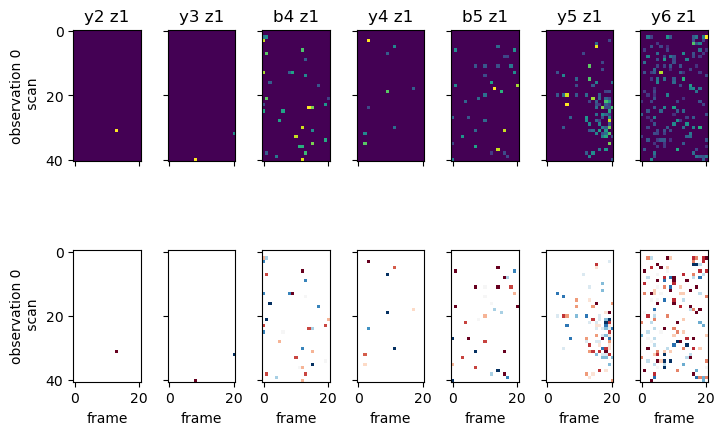

 60%|██████    | 6/10 [00:18<00:12,  3.01s/it]

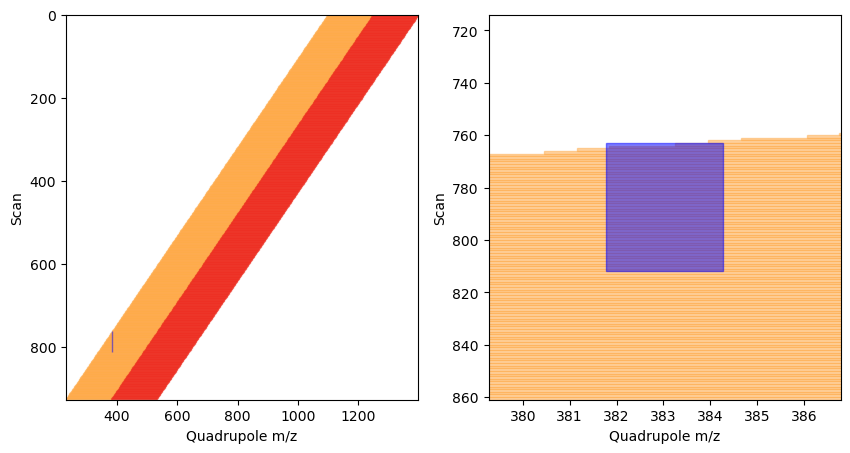

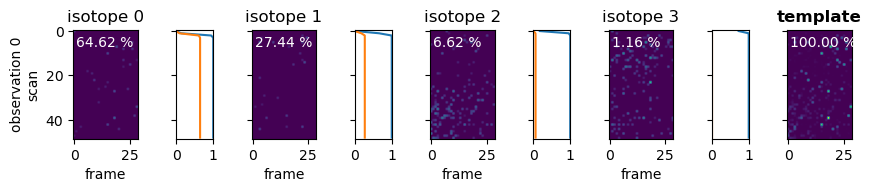

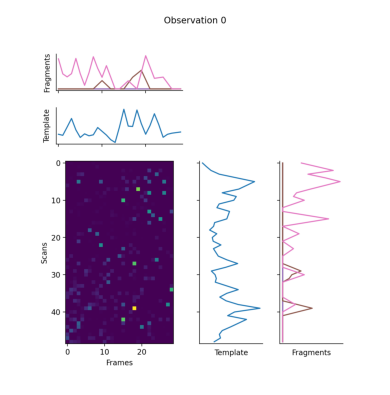

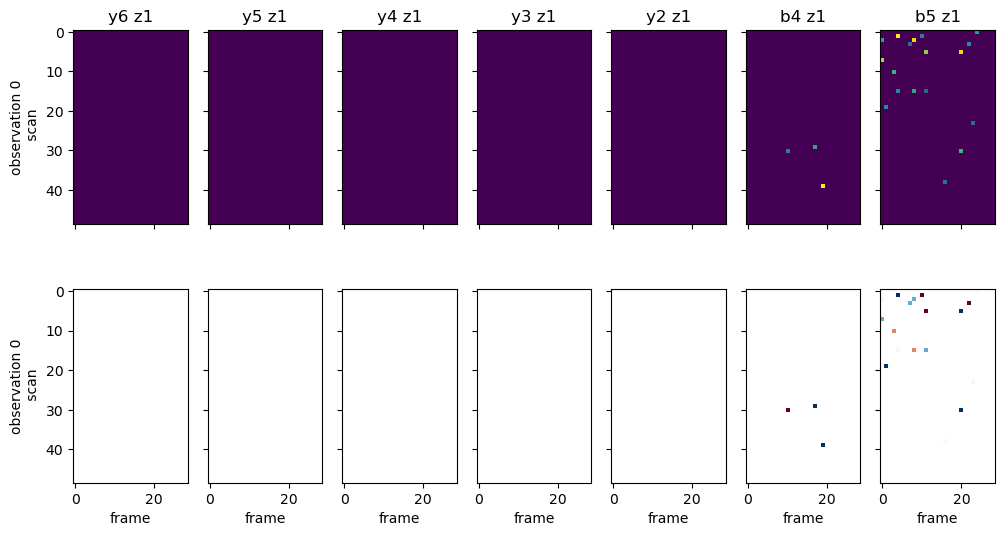

 70%|███████   | 7/10 [00:20<00:08,  2.86s/it]

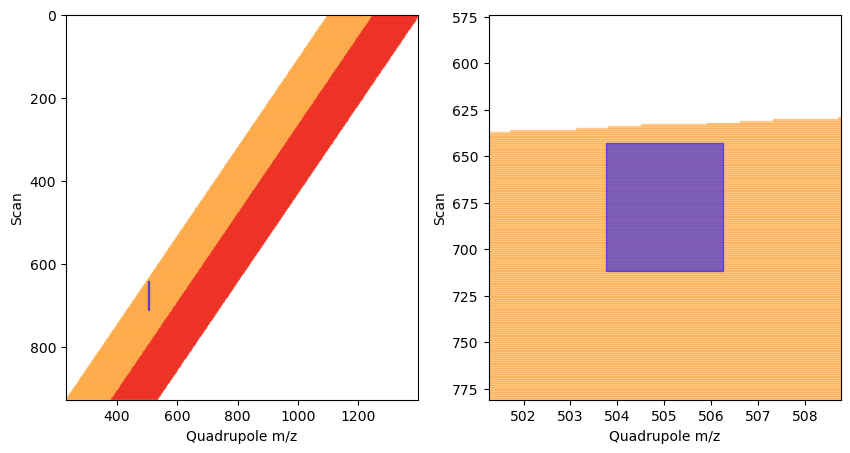

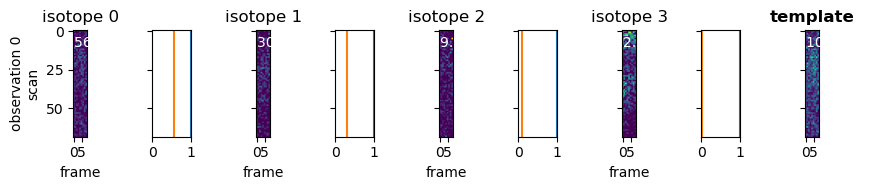

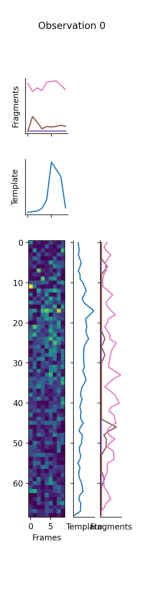

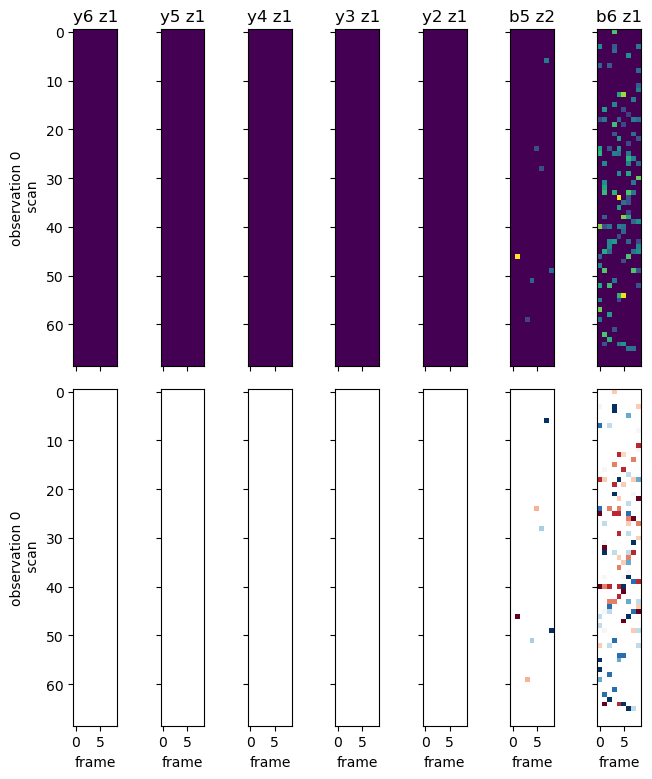

 80%|████████  | 8/10 [00:24<00:06,  3.01s/it]

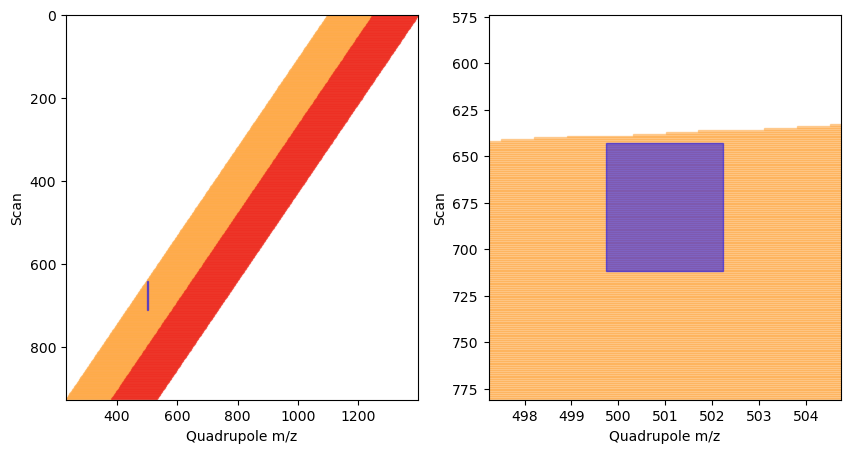

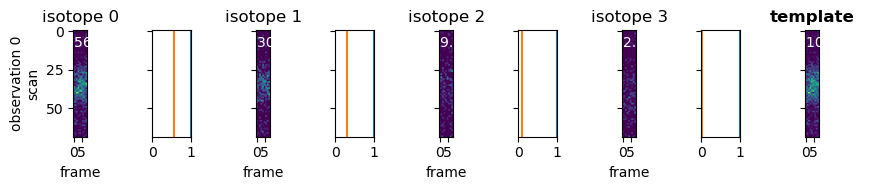

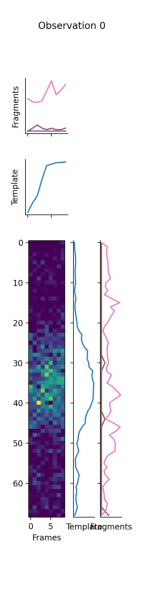

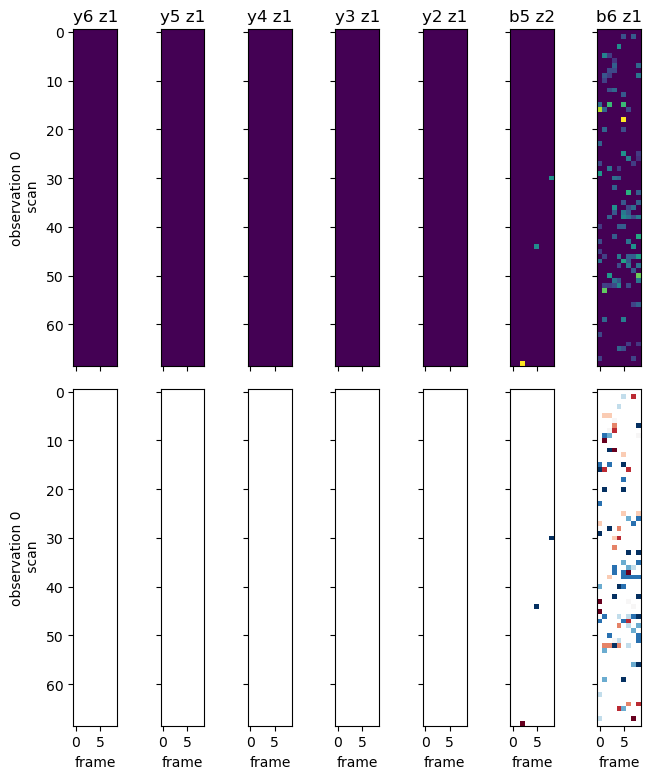

 90%|█████████ | 9/10 [00:27<00:03,  3.09s/it]

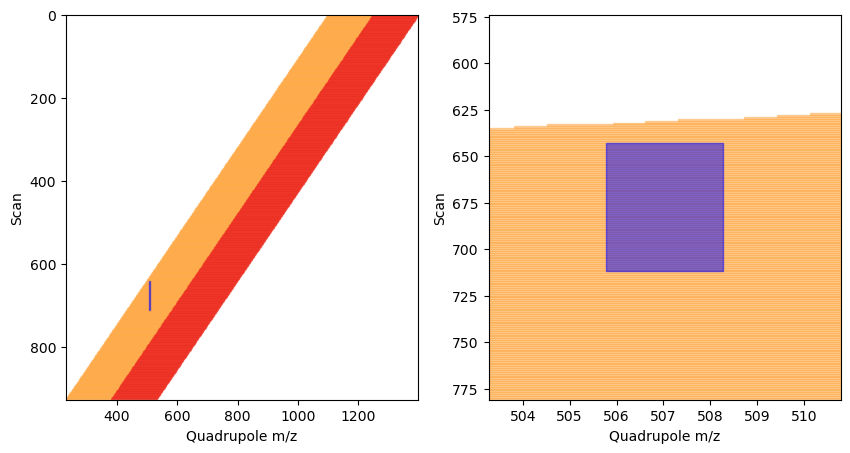

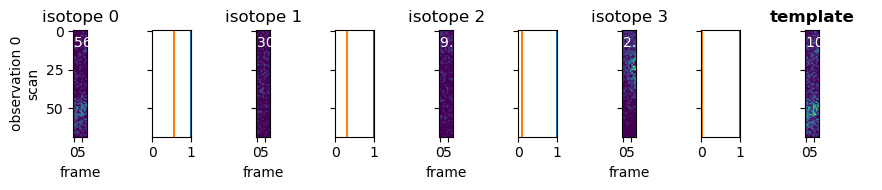

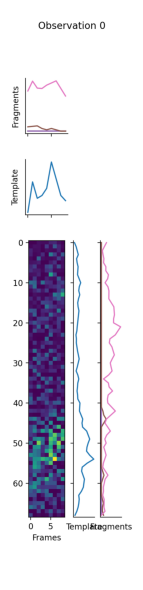

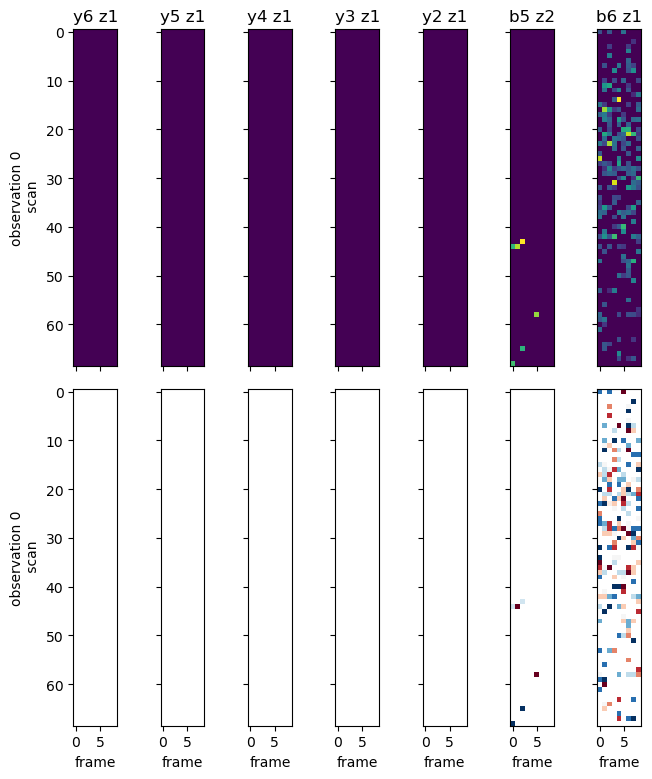

100%|██████████| 10/10 [00:29<00:00,  2.98s/it]


In [260]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction import quadrupole

q = quadrupole.SimpleQuadrupole(dia_data.cycle)

scoring_workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_exclusive,
    candidates_df,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=True
)
psm = scoring_workflow()

In [233]:
psm_df, fragment_df = psm

In [241]:
psm_df.channel.value_counts()

0     27863
4     27735
8     27557
12    26642
Name: channel, dtype: int64

In [235]:
psm_df ['id'] = np.arange(len(psm_df))

In [236]:
psm_df = psm_df[(psm_df['decoy'] == 0) | (psm_df['channel'] == 12)].copy()

In [238]:
psm_df.loc[psm_df['channel'] == 12, 'decoy'] = 1

In [231]:
psm_df.replace([np.inf, -np.inf], np.nan, inplace=True)
psm_df.dropna(how="all", inplace=True)

In [225]:
psm_df = psm_df.dropna().reset_index(drop=True).copy()
print(len(psm_df))

57868


In [232]:
# calculate the number of NA values per column
for c in psm_df.columns:
    print(c, psm_df[c].isna().sum())

precursor_idx 0
elution_group_idx 0
charge 0
rank 0
scan_start 0
scan_stop 0
scan_center 0
frame_start 0
frame_stop 0
frame_center 0
precursor_mass_error 0
mz_library 0
mz_observed 0
precursor_isotope_correlation 0
sum_precursor_intensity 0
n_fragments_matched 0
n_fragments 0
fraction_fragments 0
intensity_correlation 0
sum_fragment_intensity 0
mean_fragment_intensity 0
mean_fragment_nonzero 0
n_observations 0
mean_observation_score 0
var_observation_score 0
fragment_coverage 0
fragment_scan_correlation 0
fragment_frame_correlation 0
template_scan_correlation 0
template_frame_correlation 0
fwhm_rt 0
fwhm_mobility 0
sum_b_ion_intensity 0
sum_y_ion_intensity 0
observed_difference_b_y 0
expected_difference_b_y 51929
aggreement_b_y 51929
base_width_mobility 0
base_width_rt 0
rt_observed 0
mobility_observed 0
decoy 0
mz_calibrated 0
rt_library 0
rt_calibrated 0
rt_error 0
mobility_library 0
mobility_calibrated 0
mobility_error 0
proteins 0
channel 0
id 0


54505


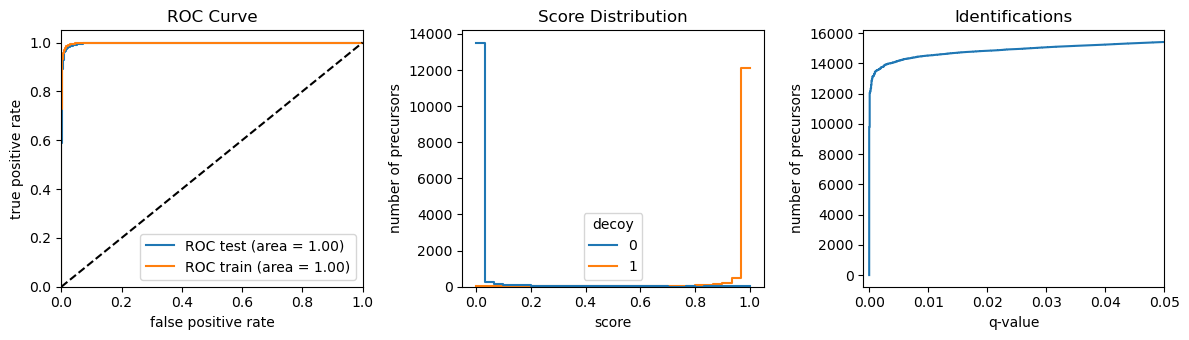

28596
(14384, 54)
3174
54377


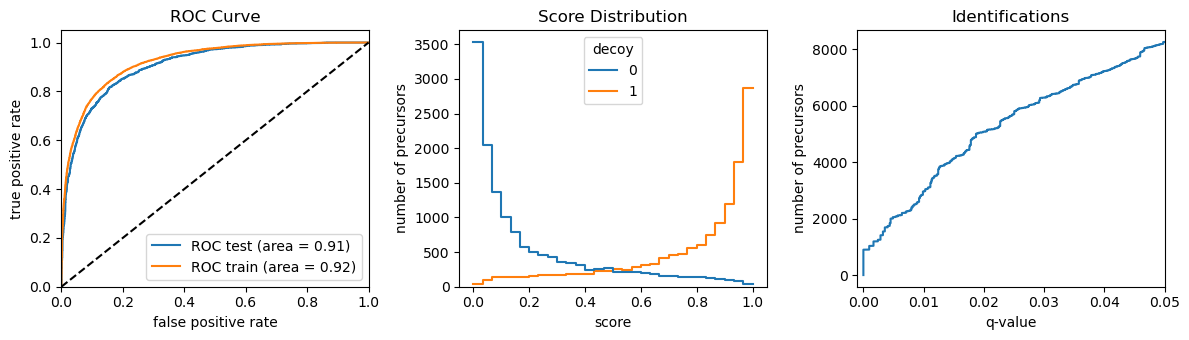

28511
(2934, 54)
1225
54199


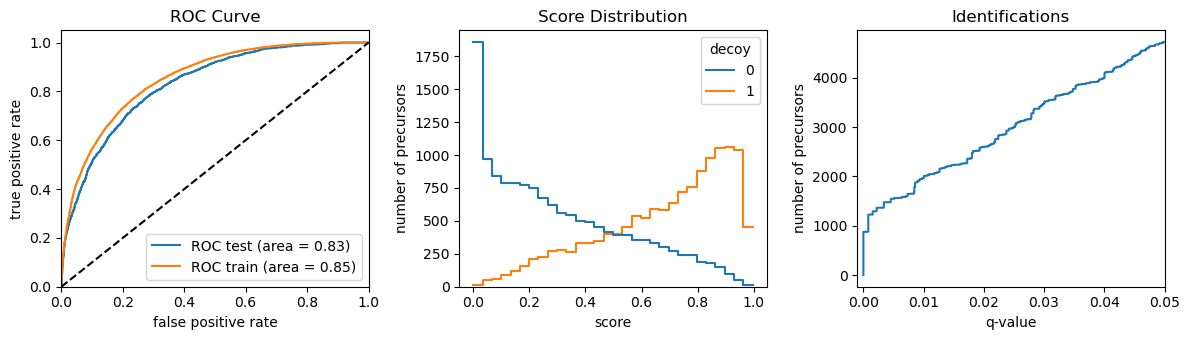

28388
(1948, 54)
818


In [240]:
from alphadia.extraction.scoring import fdr_correction

for channel in [0,4,8]:
    channel_psm_df = psm_df[psm_df['channel'].isin([channel, 12])]
    print(len(channel_psm_df))
    channel_psm_df = fdr_correction(channel_psm_df, index_group='id')
    print(len(channel_psm_df))
    print(channel_psm_df[(channel_psm_df['qval'] <= 0.01) & (channel_psm_df['decoy'] == 0)].shape)
    print(channel_psm_df[(channel_psm_df['qval'] <= 0.01) & (channel_psm_df['decoy'] == 0)]['proteins'].nunique())

In [75]:
d4_df_sig['proteins'].nunique()

1529

In [10]:
import time

performance = []

for mobility_window in [0.02, 0.03, 0.04, 0.05]:
    for rt_window in [10, 20, 30, 45, 60, 90, 120, 150, 180, 200, 250]:

        for i in range(10):

            config = hybridselection.HybridCandidateConfig()
            config.update({
                'rt_tolerance': rt_window,
                'mz_tolerance': 10.,
                'mobility_tolerance': mobility_window,
                'sigma_scale_rt': 0.5,
                'sigma_scale_mobility': 0.8,
                'f_mobility': 1.0,
                'f_rt': 0.95,
                'center_fraction': 0.01,
                'min_size_rt': 3,
                'candidate_count':3
            })

            start_time = time.time()
            selection = hybridselection.HybridCandidateSelection(
                dia_data,
                precursors_flat.sample(1000),
                fragments_flat,
                config.jitclass(),
                rt_tolerance=80,
                mz_tolerance=15,
                mobility_tolerance=0.05,
                candidate_count=1,
                thread_count=10,
                debug=False,
                group_channels=False,
                top_k_precursors=3,
                top_k_fragments=12,
                rt_column='rt_calibrated',
                precursor_mz_column='mz_calibrated',
                fragment_mz_column='mz_library',
                mobility_column='mobility_calibrated'
            )
            candidates = selection()
            stop_time = time.time()

            performance.append({
                'mobility_window': mobility_window,
                'rt_window': rt_window,
                'duration': stop_time - start_time
            })

0:17:21.478089  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:21.478498  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:21.478738  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80
0:17:21.478967  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 18.56
100%|██████████| 999/999 [00:00<00:00, 8618.98it/s]
0:17:22.089936  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:22.090487  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:22.090732  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80
0:17:22.090960  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 18.56
100%|██████████| 999/999 [00:00<00:00, 10741.94it/s]
0:17:22.487150  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
0:17:22.487524  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:17:22.487759  INFO: Expected peak length in RT is 10.00 seconds, sigma is 1.80

In [17]:
performance_df = pd.DataFrame(performance)
path = '/Users/georgwallmann/Library/CloudStorage/OneDrive-Personal/Studium/MPI/AG Mann/alphaDIA/slide_decks/2023_04_18_Borgwardt_Symposium/raw_data'

performance_df.to_csv(os.path.join(path, 'performance.tsv'), index=False, sep='\t')


In [22]:
performance_df['it/s'] = 1000 / performance_df['duration']
performance_df['mobility_window'] = performance_df['mobility_window']*2
performance_df['rt_window'] = performance_df['rt_window']*2

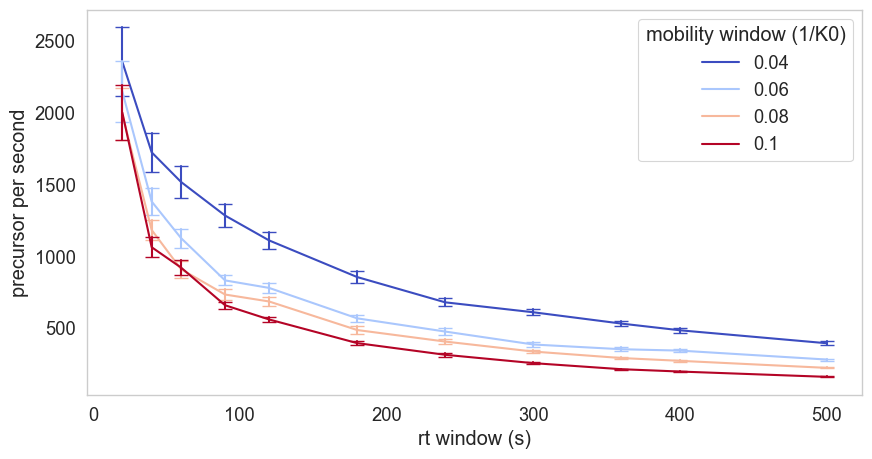

In [42]:
# plot the datapoints with error bars in seaborn
# remove the grid style
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=performance_df,
    x="rt_window",
    y="it/s",
    hue="mobility_window",
    err_style="bars", 
    errorbar=("se", 2),
    err_kws={'capsize':5},
    palette='coolwarm'
)
ax.set_xlabel('rt window (s)')
ax.set_ylabel('precursor per second')
plt.legend(title='mobility window (1/K0)')

fig.savefig(os.path.join(path, 'performance.png'), bbox_inches='tight', dpi=300)


In [15]:
size = 256*128
mflops = 4500

In [16]:
2*mflops/(5*size*np.log2(size))

0.003662109375

In [59]:
gaussian_filter = hybridselection.GaussianFilter(
            dia_data,
            kernel_size=20
        )

4:24:13.931934  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
4:24:13.932534  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
4:24:13.932885  INFO: Expected peak length in RT is 10.00 seconds, sigma is 3.61
4:24:13.933089  INFO: Expected peak length in mobility is 0.03 1/K_0, sigma is 23.20


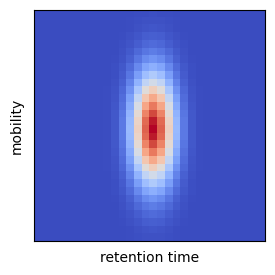

In [67]:


kernel = gaussian_filter.get_kernel()

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(kernel, cmap='coolwarm', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.ylabel('mobility')
plt.xlabel('retention time')
fig.savefig(f'{path}/kernel.png', dpi=300)
plt.show()

In [36]:
features = []
decoy = []
rank = []
pidx = []

for eg in candidates:
    for c in eg.candidates:
        features.append(c.features)
        decoy.append(c.decoy)
        rank.append(c.rank)
        pidx.append(c.precursor_idx)
        
features = np.array(features)
decoy = np.array(decoy)
rank = np.array(rank)
pidx = np.array(pidx)

In [37]:
max_pidx = pidx.max()
candidate = pidx + max_pidx * rank

In [38]:
df = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_07_v1.0.2/HeLa full proteome/alpha_psms.tsv', sep='\t')

In [39]:
candidate_df = df['precursor_idx'].values + max_pidx * df['rank'].values

In [40]:
#mask = np.isin(candidate, candidate_df)

In [58]:
np.float_

numpy.float64

In [41]:
features_masked = features#[mask]
decoy_masked = decoy#[mask]
rank_masked = rank#[mask]
pidx_masked = pidx#[mask]


In [42]:
qval_mask = np.isin(pidx_masked, df[df['qval'] < 0.01]['precursor_idx'].values)

In [35]:
pidx_masked

array([330413, 330406, 287908, ..., 113298, 162935, 287896])

In [34]:
qval_mask.shape

(58193,)

In [43]:
qval_mask.sum()
len(qval_mask)

2088871

In [25]:
decoy.sum()

1039254

1307970


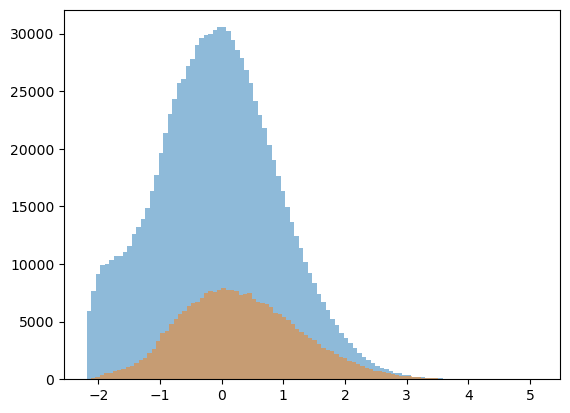

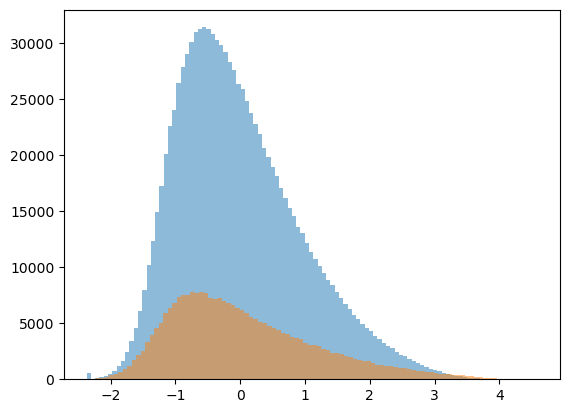

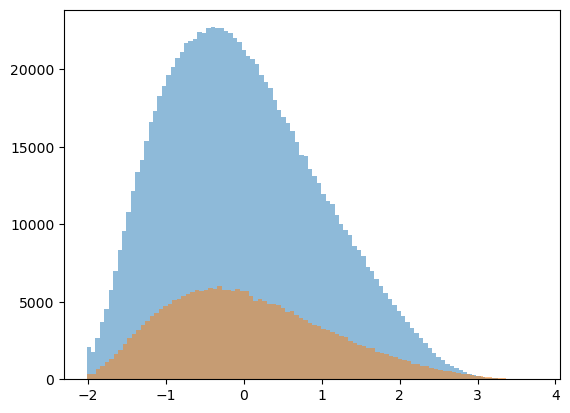

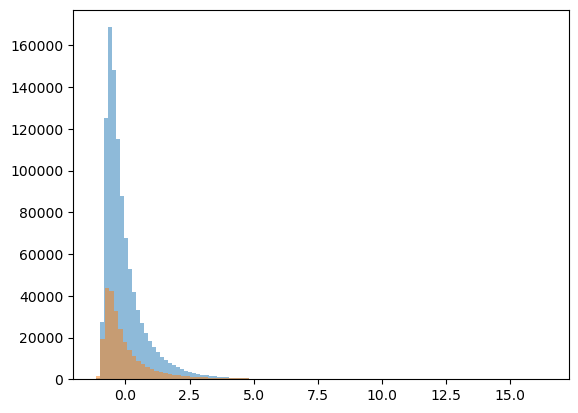

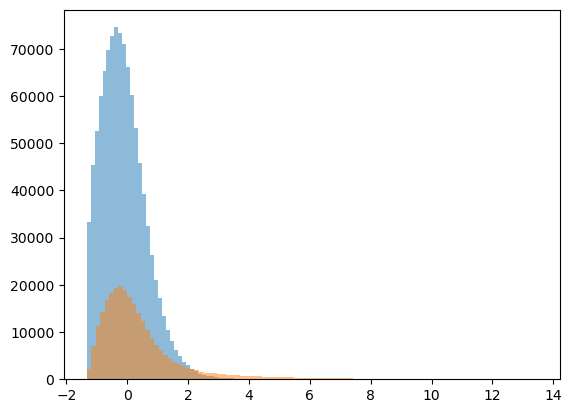

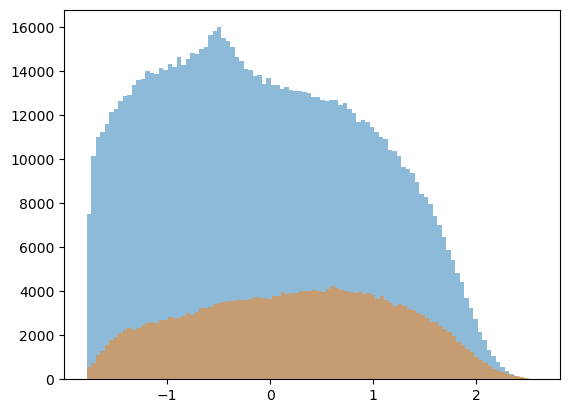

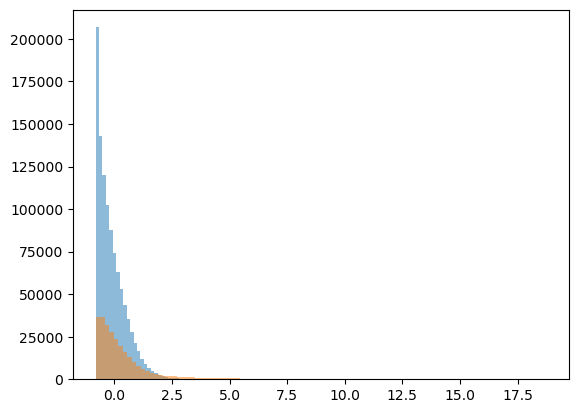

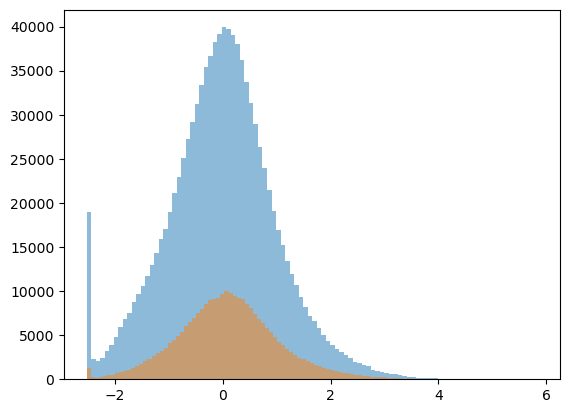

KeyboardInterrupt: 

In [45]:
from sklearn.linear_model import LogisticRegression


def train_classifier(features, decoy, qval_mask):
    # keep all decoys and targets within the qval mask
    to_keep = np.logical_or(decoy, qval_mask)
    features = features[to_keep]
    decoy = decoy[to_keep].astype(bool)

    print(len(features))

    mean = features.mean(axis=0, keepdims=True)
    std = features.std(axis=0, keepdims=True)

    # normalize features
    features = (features - mean)/std

    for i in range(features.shape[1]):
        plt.hist(features[decoy, i], bins=100, alpha=0.5, label='decoy')
        plt.hist(features[~decoy, i], bins=100, alpha=0.5, label='target')
        plt.show()

    # invert the decoy column
    decoy = ~decoy

    lr = LogisticRegression()
    lr.fit(features, decoy)
    print(lr.score(features, decoy))

    # print lr coefficients
    print(mean)
    print(std)
    print(lr.coef_)
    print(lr.intercept_)

train_classifier(features_masked, decoy_masked, qval_mask)


In [ ]:
0.7719351416881346
[[ 2.967344    1.2160938   1.426444   13.960179    0.06620345  0.44364494
   0.03138363  3.1453438 ]]
[[ 1.2583724   0.91052234  1.2126098  14.557817    0.04327635  0.24623954
   0.03225865  1.2671406 ]]
[[ 0.43898424  0.97879761  0.72262148 -0.22705527 -0.21353988  0.3174245
   0.30102549  0.44892641]]
[-0.22941813]

In [110]:
features_masked[:,3] = np.log(features_masked[:,3]+0.0001)
features_masked[:,4] = np.log(features_masked[:,4]+0.0001)

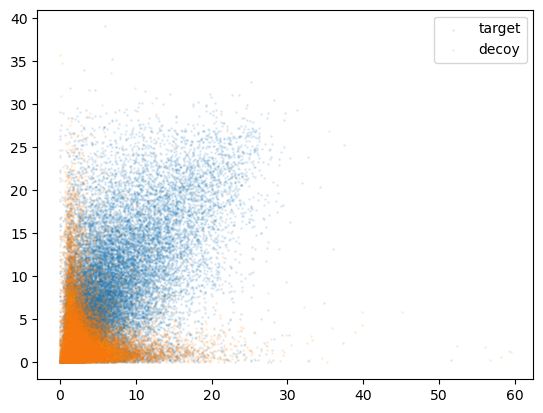

In [143]:
plt.scatter(features_masked[decoy_masked == 0,1], features_masked[decoy_masked == 0,6], label='target', alpha=0.1, s=1)
plt.scatter(features_masked[decoy_masked == 1,1], features_masked[decoy_masked == 1,6], label='decoy', alpha=0.1, s=1)
plt.legend()

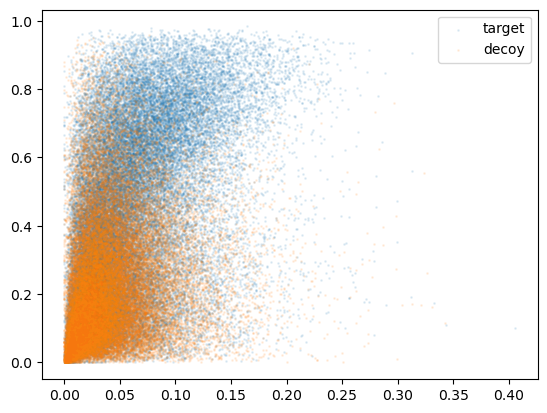

In [112]:
plt.scatter(features_masked[decoy_masked == 0,2], features_masked[decoy_masked == 0,7], label='target', alpha=0.1, s=1)
plt.scatter(features_masked[decoy_masked == 1,2], features_masked[decoy_masked == 1,7], label='decoy', alpha=0.1, s=1)
plt.legend()

(array([9.400e+01, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 6.000e+00,
        3.000e+00, 8.000e+00, 6.000e+00, 5.000e+00, 1.100e+01, 9.000e+00,
        1.000e+01, 1.900e+01, 1.400e+01, 2.700e+01, 2.400e+01, 2.300e+01,
        2.000e+01, 4.200e+01, 5.200e+01, 4.000e+01, 7.000e+01, 6.500e+01,
        9.200e+01, 1.090e+02, 1.640e+02, 1.730e+02, 1.750e+02, 2.730e+02,
        3.100e+02, 3.620e+02, 4.590e+02, 5.290e+02, 6.800e+02, 7.320e+02,
        9.150e+02, 1.063e+03, 1.318e+03, 1.451e+03, 1.692e+03, 1.928e+03,
        2.043e+03, 2.197e+03, 2.228e+03, 2.228e+03, 2.273e+03, 2.162e+03,
        2.125e+03, 1.793e+03, 1.773e+03, 1.569e+03, 1.396e+03, 1.252e+03,
        1.122e+03, 9.850e+02, 8.450e+02, 6.870e+02, 6.350e+02, 5.230e+02,
        4.510e+02, 3.550e+02, 3.250e+02, 2.470e+02, 1.930e+02, 1.630e+02,
        1.410e+02, 8.500e+01, 8.300e+0

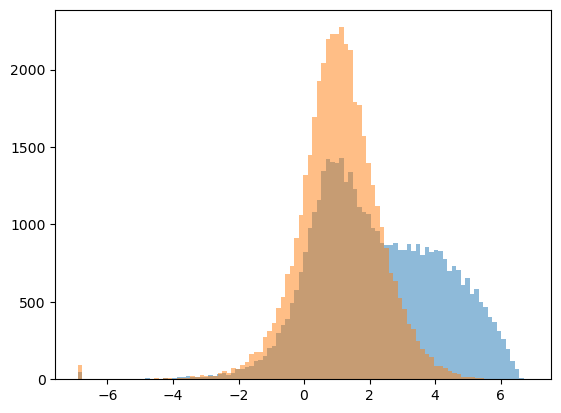

In [113]:
int_diff = np.log((features_masked[:,1] * features_masked[:,6])+0.001)
plt.hist(int_diff[decoy_masked == 0], bins=100, label='target', alpha=0.5)
plt.hist(int_diff[decoy_masked == 1], bins=100, label='decoy', alpha=0.5)

(array([178.,  83.,  53.,  49.,  59.,  58.,  59.,  59.,  52.,  63.,  41.,
         63.,  52.,  57.,  67.,  68.,  50.,  81.,  61.,  58.,  64.,  72.,
         71.,  81.,  84.,  82.,  69.,  76.,  82.,  97.,  81.,  70.,  94.,
         87., 104., 102., 116., 112., 100., 122.,  99.,  95., 104.,  91.,
         87.,  92., 109., 106.,  94., 103., 100., 101.,  83., 111.,  94.,
         91.,  92.,  79.,  76.,  79.,  56.,  61.,  64.,  66.,  55.,  59.,
         45.,  51.,  39.,  32.,  32.,  29.,  25.,  22.,  22.,  19.,  11.,
         12.,   9.,  12.,   9.,   8.,  10.,   3.,   4.,   3.,   5.,   5.,
          0.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-6.9077554, -6.854499 , -6.8012424, -6.7479854, -6.694729 ,
        -6.6414723, -6.588216 , -6.534959 , -6.4817023, -6.428446 ,
        -6.3751893, -6.3219323, -6.268676 , -6.2154193, -6.162163 ,
        -6.108906 , -6.0556493, -6.002393 , -5.9491363, -5.8958793,
        -5.8426228, -5.7893662, -5.7361097, -5

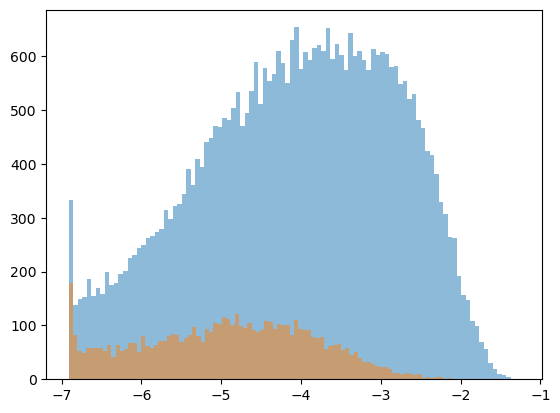

In [93]:
int_diff = np.log((features_masked[:,2] * features_masked[:,7])+0.001)
plt.hist(int_diff[decoy_masked == 0], bins=100, label='target', alpha=0.5)
plt.hist(int_diff[decoy_masked == 1], bins=100, label='decoy', alpha=0.5)

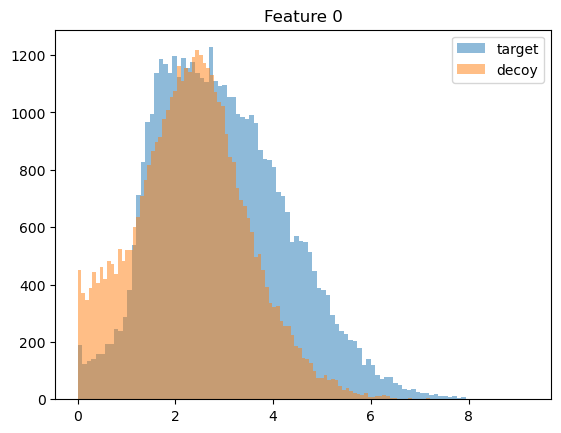

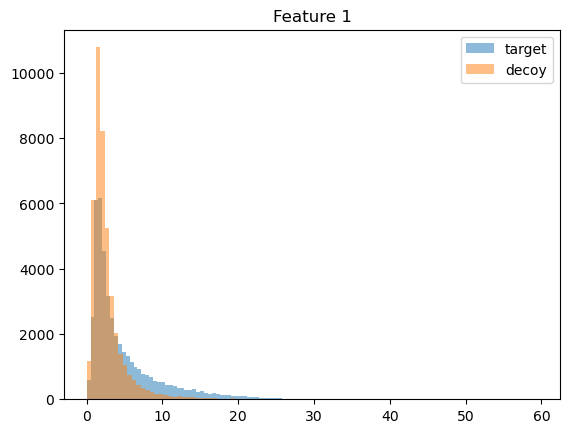

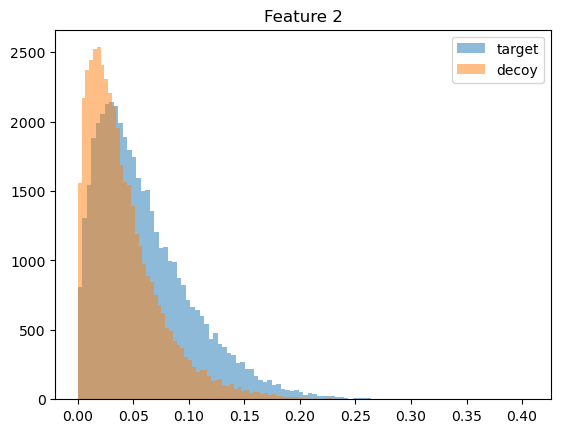

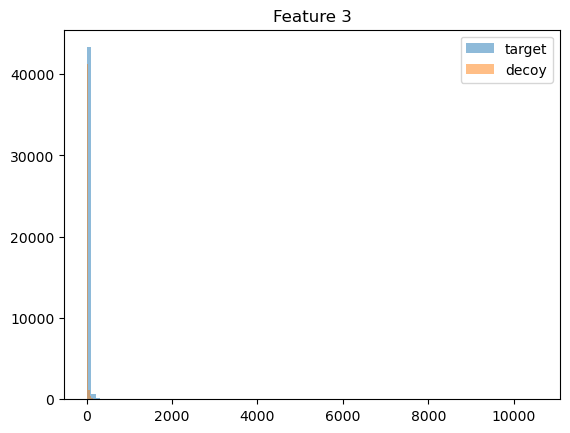

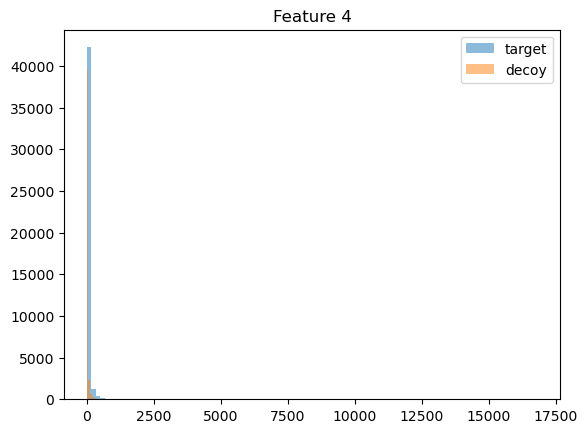

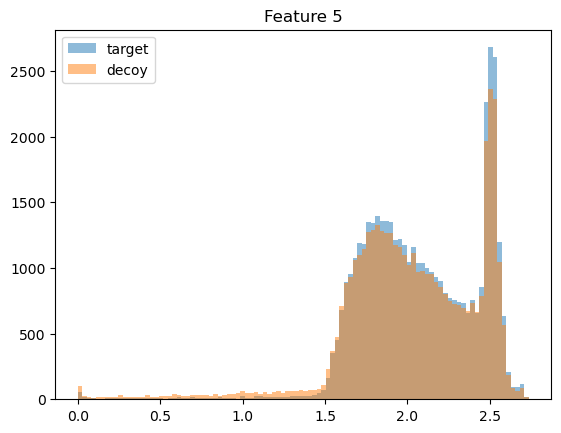

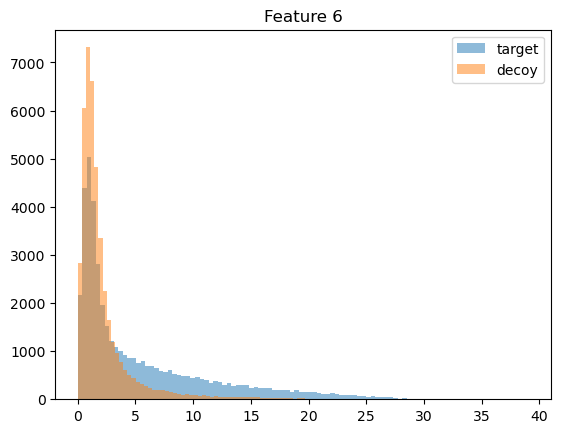

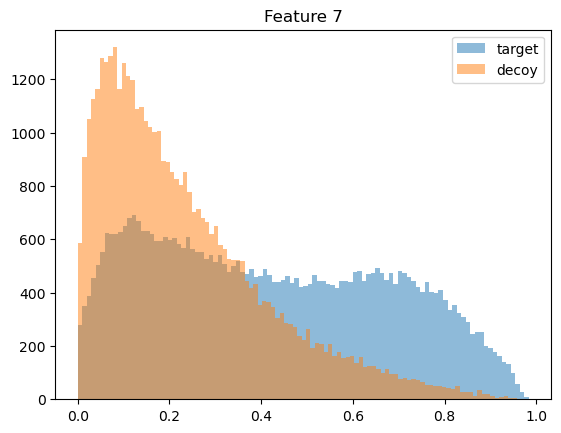

In [146]:
for i in range(features_masked.shape[1]):
    plt.figure()
    plt.hist(features_masked[decoy_masked == 0, i], label='target', bins=100, alpha=0.5)
    plt.hist(features_masked[decoy_masked == 1, i], label='decoy', bins=100, alpha=0.5)
    plt.legend()
    plt.title(f'Feature {i}')

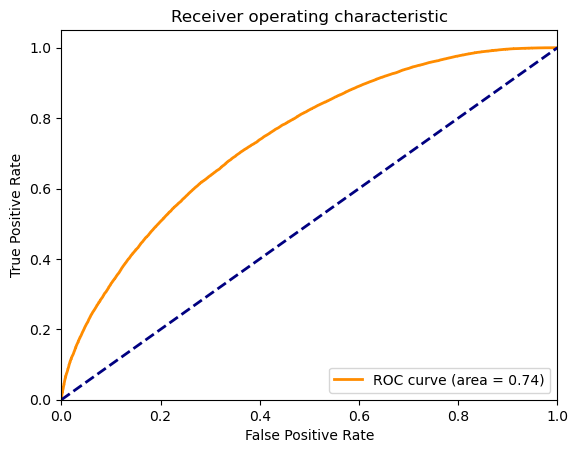

In [95]:
# train and validate a logistic regression model based on the features and decoy labels
from sklearn.linear_model import LogisticRegression
# MLP calssifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features_masked, decoy_masked, test_size=0.2, random_state=42)

sr = StandardScaler()
lr = MLPClassifier()

X_train = sr.fit_transform(X_train)
X_test = sr.transform(X_test)


lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

# evaluiate the model by plotting the score distribution for the two classes (decoy and target)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [9]:
print(features.shape)

(414938, 8)


In [108]:
from alphadia.extraction import quadrupole
q = quadrupole.SimpleQuadrupole(dia_data.cycle)

In [117]:
candidates['mz'] = candidates['precursor_mz']


  0%|          | 0/2 [00:00<?, ?it/s]

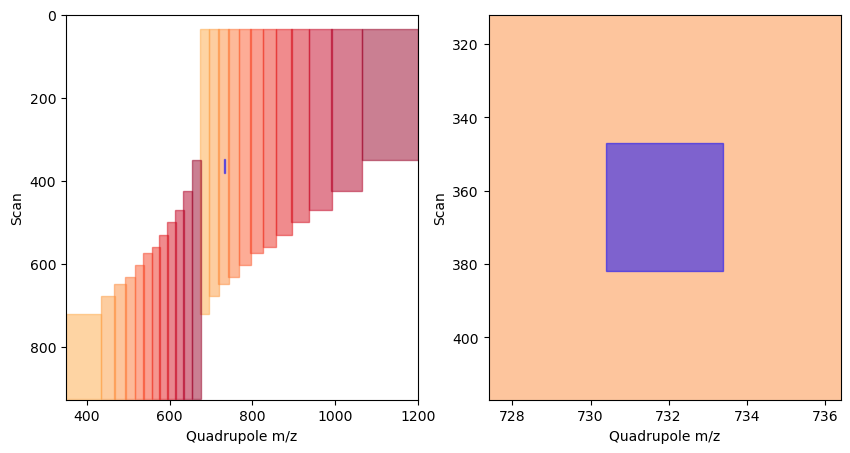

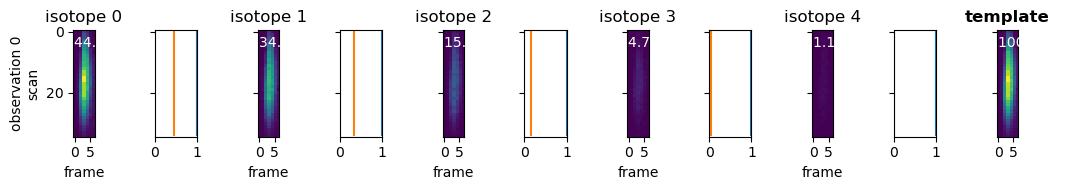

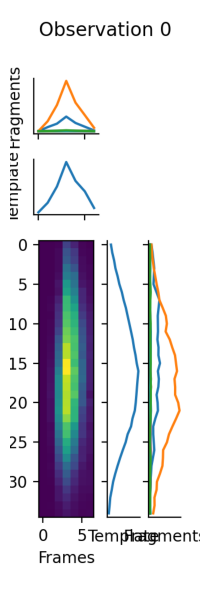

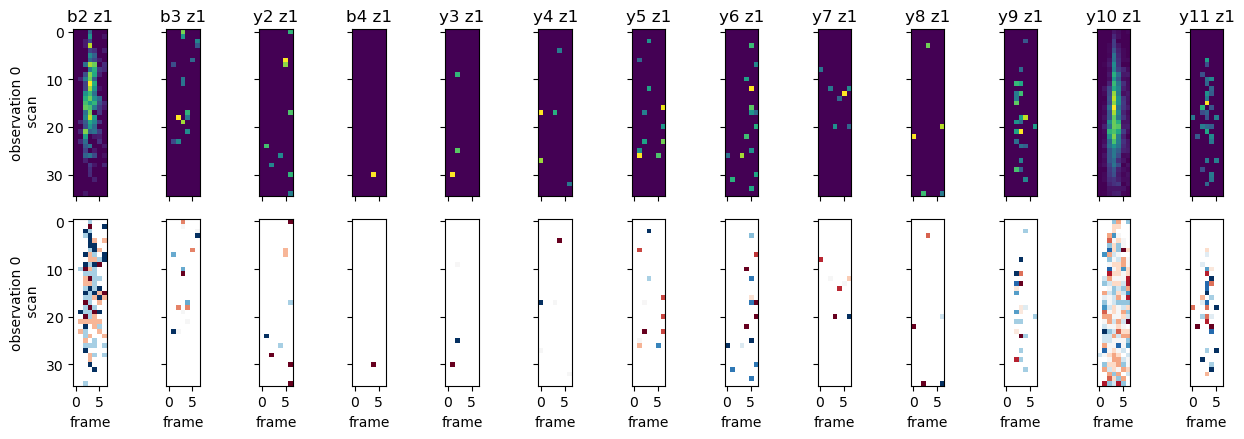

 50%|█████     | 1/2 [00:01<00:01,  1.28s/it]

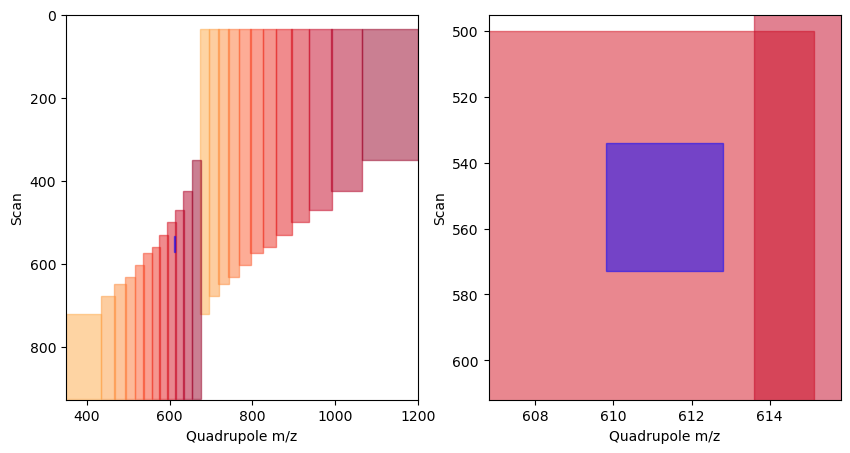

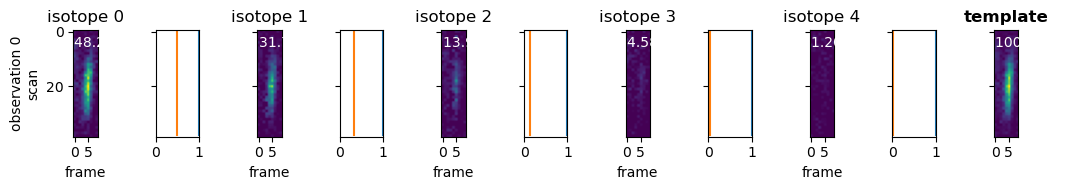

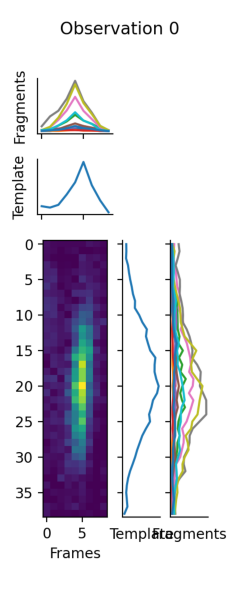

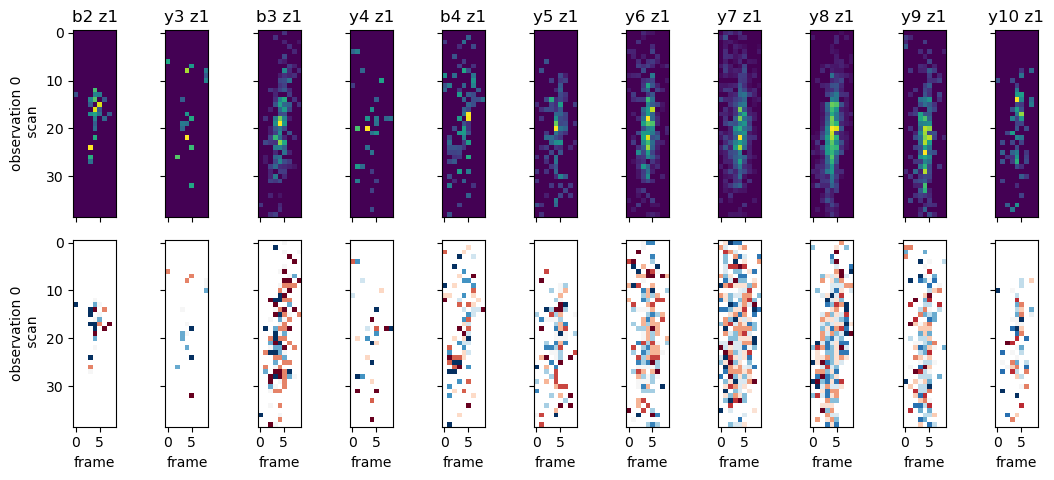

100%|██████████| 2/2 [00:02<00:00,  1.25s/it]


In [119]:
from alphadia.extraction.scoring import MS2ExtractionWorkflow

workflow = MS2ExtractionWorkflow(
    dia_data,
    precursors_flat,
    fragments_flat,
    candidates,
    q,
    precursor_mz_tolerance=15,
    fragment_mz_tolerance=15,
    fragment_mz_column='mz_calibrated',
    debug=True
)
psm = workflow()

In [111]:
psm

(   precursor_idx  elution_group_idx  charge  rank  precursor_mass_error  \
 0         230714                  2       2     0              2.743231   
 1         230714                  2       2     1              0.014830   
 2         230714                  2       2     2             -2.404601   
 3         230714                  2       2     3              1.964307   
 4         230715              76109       2     0              0.623978   
 5         230715              76109       2     1              0.971404   
 6         230715              76109       2     2              0.821897   
 7         230715              76109       2     3             -3.377354   
 8         230715              76109       2     4             -3.446375   
 
    mz_library  mz_observed  precursor_isotope_correlation  \
 0  730.896440   730.898438                       0.999893   
 1  730.896440   730.896423                       0.495449   
 2  730.896440   730.894653                       0.